In [1]:
# Importing essential libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
dataset = pd.read_excel("Data_Train.xlsx")
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [3]:
# Checking for dimensions of data
print("Total number of rows present in the dataset is:",dataset.shape[0])
print("Total number of columns present in the dataset is:",dataset.shape[1])

Total number of rows present in the dataset is: 10683
Total number of columns present in the dataset is: 11


In [4]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
# Basic understanding of  data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


###### So, there are total "10683 - rows" and "11 - columns" in the dataset, out off which "10 columns" are "Categorical" and "1"column is numerical".

In [6]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
dataset.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

###### There is 1 missing recoeds in "Route" and "Total_atops" feature.

## Basic description of data

In [8]:
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
# As "Price" is the only numerical column in the entire dataset, so that's why we are geeting only "Price".

In [10]:
# For categorical/object columns
dataset.describe(include = 'O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


##### Checking for missing values

In [11]:
null_counts = dataset.isnull().sum().sort_values(ascending = False)
null__percentage = round(null_counts/len(dataset) * 100,2)
null_info = pd.concat([null_counts, null__percentage], axis = 1)
null_info.columns = ['Null_counts', 'Null_%']
null_info


,Null_counts,Null_%
Route,1,0.01
Total_Stops,1,0.01
Airline,0,0.00
Date_of_Journey,0,0.00
Source,0,0.00
Destination,0,0.00
Dep_Time,0,0.00
Arrival_Time,0,0.00
Duration,0,0.00
Additional_Info,0,0.00


In [12]:
# Dropping the missing values
dataset.dropna(inplace = True)

In [13]:
# Finding unique values in the columns
for i in dataset.columns:
    print("*"*45, i,"*"*45)
    print()
    print(set(dataset[i].tolist()))
    print()
    
    

********************************************* Airline *********************************************

{'Vistara Premium economy', 'Jet Airways', 'Air India', 'SpiceJet', 'Air Asia', 'IndiGo', 'Jet Airways Business', 'Multiple carriers', 'Vistara', 'GoAir', 'Trujet', 'Multiple carriers Premium economy'}

********************************************* Date_of_Journey *********************************************

{'27/04/2019', '15/06/2019', '27/03/2019', '27/05/2019', '9/06/2019', '15/04/2019', '9/04/2019', '03/03/2019', '1/06/2019', '06/03/2019', '15/03/2019', '24/04/2019', '18/03/2019', '18/06/2019', '09/03/2019', '6/03/2019', '21/03/2019', '21/06/2019', '6/04/2019', '3/04/2019', '18/04/2019', '18/05/2019', '27/06/2019', '3/03/2019', '9/03/2019', '9/05/2019', '12/04/2019', '12/03/2019', '21/04/2019', '15/05/2019', '12/05/2019', '1/05/2019', '21/05/2019', '1/04/2019', '24/05/2019', '6/05/2019', '6/06/2019', '3/05/2019', '01/03/2019', '24/03/2019', '3/06/2019', '1/03/2019', '24/06/2019', 

In [14]:
for i in  dataset.columns:
    print(f"Value counts in feature {i} are: ", dataset[i].value_counts(), sep = '\n')
    print("*"*60)

Value counts in feature Airline are: 
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
************************************************************
Value counts in feature Date_of_Journey are: 
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019   

## Insights

###### 1) In "Airline" column the primium economy coumns names need to be same name as the Airline names.

###### 2) "Date of journey" column nedds to split in Day, month and year for better understanding.

###### 3) In "Destination" column the input "New Delhi" needs to changed to "Delhi"

###### 4) From Depaarture time, Arrival Time and Duration need to extract Hours amd Minutes.

###### 5) As "Route" and "Total_stops" column conveys the same information, "Route" column needs to be dropped.

###### 6) Majority of Records in 'Additional_Info' column has no info. We can later drop this feature.

### Checking Duplicate Records

In [15]:
dataset.duplicated().sum()

220

##### There are 220 duplicate records in the dataset

In [16]:
# dropping the duplicates
dataset.drop_duplicates(keep = 'first', inplace = True)

In [17]:
# checking shape of dataset after dropping duplicates
dataset.shape

(10462, 11)

## Feature Engineereing

##### Converting "Total_stops" column from object to int.

In [18]:
dataset["Total_Stops"] = dataset["Total_Stops"].str.replace('non-stop', '0')
dataset["Total_Stops"] = dataset["Total_Stops"].str.replace('1 stop', '1')
dataset["Total_Stops"] = dataset["Total_Stops"].str.replace('2 stops', '2')
dataset["Total_Stops"] = dataset["Total_Stops"].str.replace('3 stops', '3')
dataset["Total_Stops"] = dataset["Total_Stops"].str.replace('4 stops', '4')
dataset['Total_Stops'] = dataset["Total_Stops"].astype(int)

##### Merging "New Delhi" with "Delhi"

In [19]:
dataset['Destination'] = np.where(dataset['Destination']== 'New Delhi', 'Delhi',dataset['Destination'])

##### Merging Permium and business class to economy class - As few data available in premium and business class.

In [20]:
dataset['Airline'] = np.where(dataset['Airline'] == 'Jet Airways Business', 'Jet Airways', dataset['Airline'])
dataset['Airline'] = np.where(dataset['Airline'] == 'Vistara Premium economy', 'Vistara', dataset['Airline'])
dataset['Airline'] = np.where(dataset['Airline'] == 'Multiple carriers Premium economy', 'Multiple carriers', dataset['Airline'])


In [21]:
# Extracting only hours from "Duration" column.
dataset['Duration'] = dataset['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

# Rounding up the values in the column to 2 decimal points.
dataset['Duration'] = dataset['Duration'].apply(lambda x: round(x, 2))

In [22]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,Null,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,Null,13302


##### Extracting "Day", "Month", "Year" and "Weekday" values from "Date_of_Journey" column

In [23]:
dataset['Date_of_Journey'] = pd.to_datetime(dataset['Date_of_Journey'])
dataset['day'] = pd.DatetimeIndex(dataset['Date_of_Journey']).day
dataset['month'] = pd.DatetimeIndex(dataset['Date_of_Journey']).month
dataset['year'] = pd.DatetimeIndex(dataset['Date_of_Journey']).year
dataset['weekday'] = pd.DatetimeIndex(dataset['Date_of_Journey']).weekday


##### Checking for Unique values in columns extrated from 'Date_of_Journey'.

In [24]:
cols = ['day', 'month', 'year', 'weekday']

unique_values = {col: dataset[col].unique() for col in cols if col in dataset}

for column, values in unique_values.items():
    print(f"Column '{column}':\n{values}\n{'*' * 50}\n")


Column 'day':
[24  1  9 12 27 18  3 15  6 21]
**************************************************

Column 'month':
[3 5 6 4]
**************************************************

Column 'year':
[2019]
**************************************************

Column 'weekday':
[6 2 4 0 1 5 3]
**************************************************



In [25]:
# So, as we can see that 'year' column have only single value, so we can drop it.
# Also we have extracted important features from 'Date_of_Journey'column, so we can drop it also.
dataset = dataset.drop(['year', 'Date_of_Journey'], axis = 1)


##### COnvereting 'Dep_time' and 'Arrival_time' into datetime and extracting hours and minutes from it.

In [26]:
dataset['Arrival_Time'] = pd.to_datetime(dataset['Arrival_Time'])
dataset['Dep_Time'] = pd.to_datetime(dataset['Dep_Time'])

# Extracting hours and minutes
def extract_hour(data, col):
    data[col+'_Hour'] = data[col].dt.hour
    
def extract_min(data, col):
    data[col+'_Min'] = data[col].dt.minute

    
extract_hour(dataset,'Dep_Time')
extract_min(dataset, 'Dep_Time')
extract_hour(dataset, 'Arrival_Time')
extract_min(dataset, 'Arrival_Time')

In [27]:
dataset['Dep_Time'] = dataset['Dep_Time'].dt.strftime('%H:%M')
dataset['Arrival_Time'] = dataset['Arrival_Time'].dt.strftime('%H:%M')

In [28]:
# Finction to categorize 'Arrival_Time' and 'Dep_Time' 
def categorize_time(time_str):
    time = pd.to_datetime(time_str, format = '%H:%M').time()
    
    if time >= pd.to_datetime('06:00', format = '%H:%M').time() and time < pd.to_datetime('12:00', format = '%H:%M').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00', format = '%H:%M').time() and time < pd.to_datetime('17:00', format = '%H:%M').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00', format = '%H:%M').time() and time < pd.to_datetime('20:00', format = '%H:%M').time():
        return 'Evening'
    elif time >= pd.to_datetime('20:00', format = '%H:%M').time() and time <= pd.to_datetime('23:59', format = '%H:%M').time():
        return 'Night'
    else:
        return 'Early_Morning'
    

In [29]:
dataset['Dep_Time_Category'] = dataset['Dep_Time'].apply(categorize_time)
dataset['Arrival_Time_Category'] = dataset['Arrival_Time'].apply(categorize_time)

In [30]:
# Dropping 'Additional_Info' column as it contains lot of null values almost above 70%.
# Dropping 'Route' column as it is giving sam information as Total_stops.
# Dropping 'Dep_Time', 'Arrival_Time' - As we have extracted necessary info.
dataset = dataset.drop(['Additional_Info', 'Route', 'Dep_Time', 'Arrival_Time'], axis = 1)

In [31]:
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Dep_Time_Category,Arrival_Time_Category
0,IndiGo,Banglore,Delhi,2.83,0,3897,24,3,6,22,20,1,10,Night,Early_Morning
1,Air India,Kolkata,Banglore,7.42,2,7662,1,5,2,5,50,13,15,Early_Morning,Afternoon
2,Jet Airways,Delhi,Cochin,19.00,2,13882,9,6,6,9,25,4,25,Morning,Early_Morning
3,IndiGo,Kolkata,Banglore,5.42,1,6218,12,5,6,18,5,23,30,Evening,Night
4,IndiGo,Banglore,Delhi,4.75,1,13302,1,3,4,16,50,21,35,Afternoon,Night


# Explorartory Data Analysis

In [32]:
def count_plot(data, x_column):
    counts = data[x_column].value_counts().sort_values(ascending=False)
    custom_palette = sns.color_palette('Set1', len(counts))
    plt.figure(figsize=(13, 7))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=x_column, fontsize=14, fontweight='bold', color='#333333')
    
    ax = sns.countplot(data=data, x=x_column, order=counts.index, palette=custom_palette)

    total = len(data[x_column])
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black')

    sns.despine()
    plt.tight_layout()
    plt.show()

#### 1)  Analysis of Airline

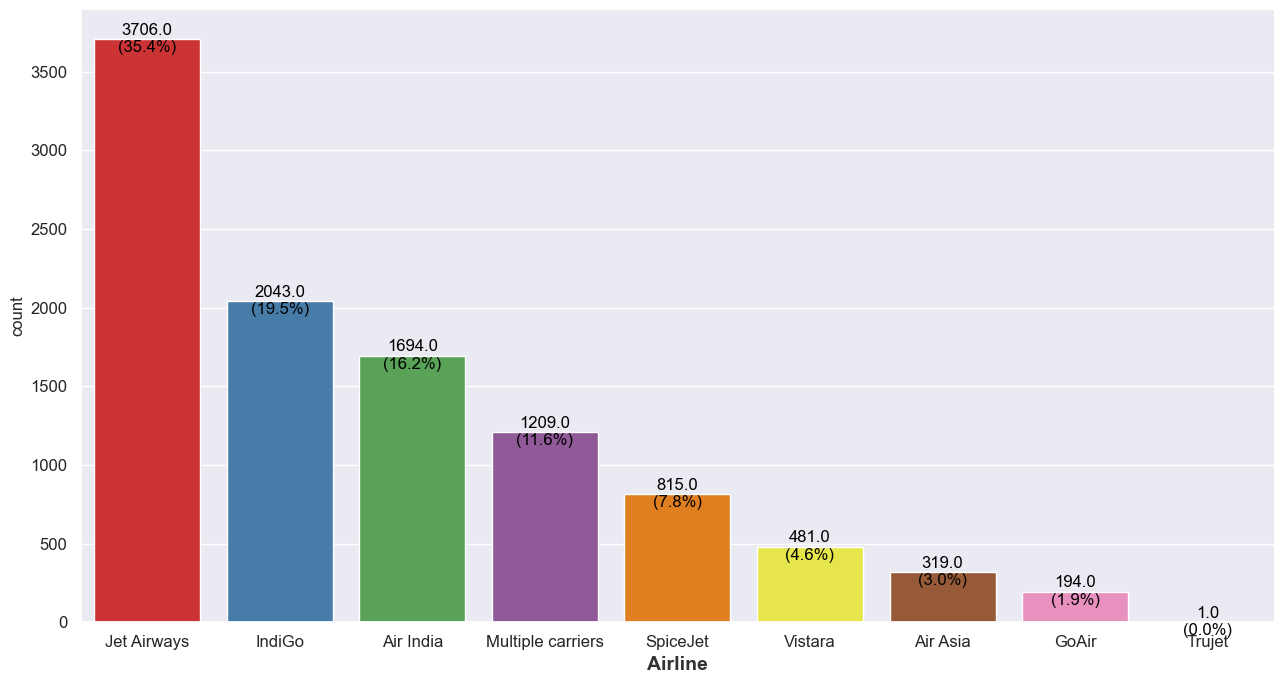

In [33]:
count_plot(dataset, x_column = 'Airline')

### Insights:

###### From the count_plot we can sat that, Jet Airways is the most frequently used Airline, followed by Indigo.

#### 2) Analysis by Total_stops

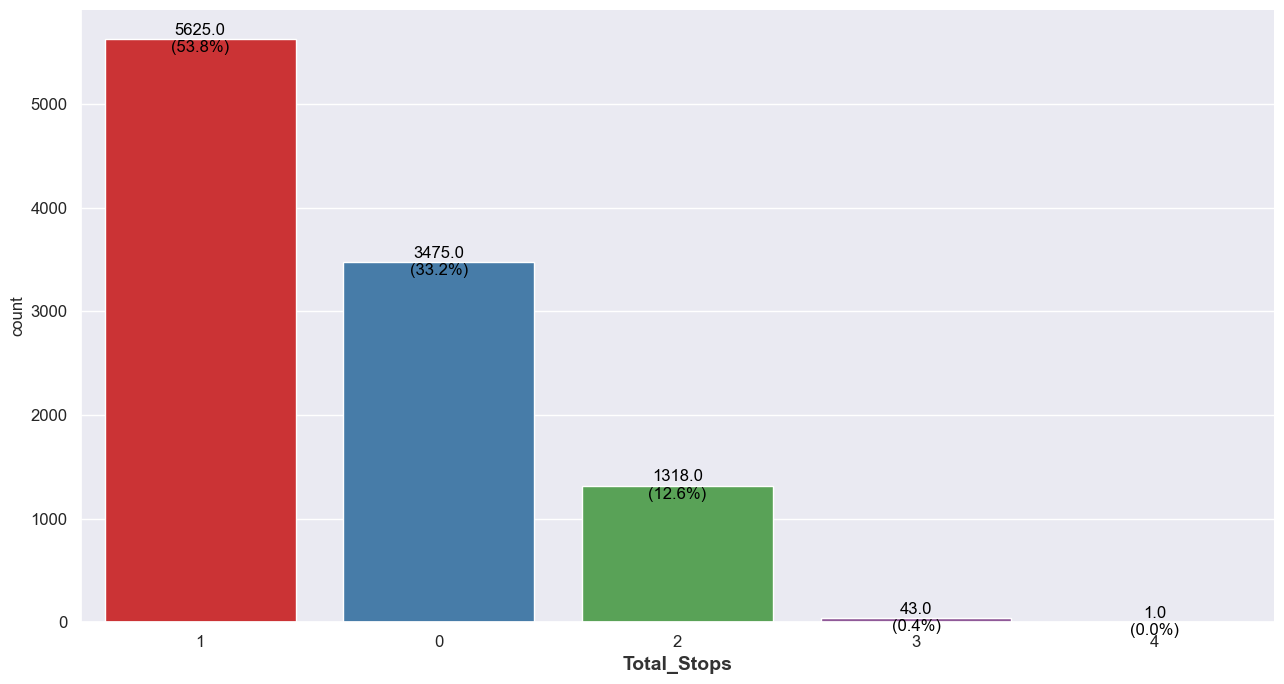

In [34]:
count_plot(dataset, x_column = 'Total_Stops')

### Insights:

###### From this, we can say that majority of Airlines have one stop flights only.

#### 3) Analyzing by Source

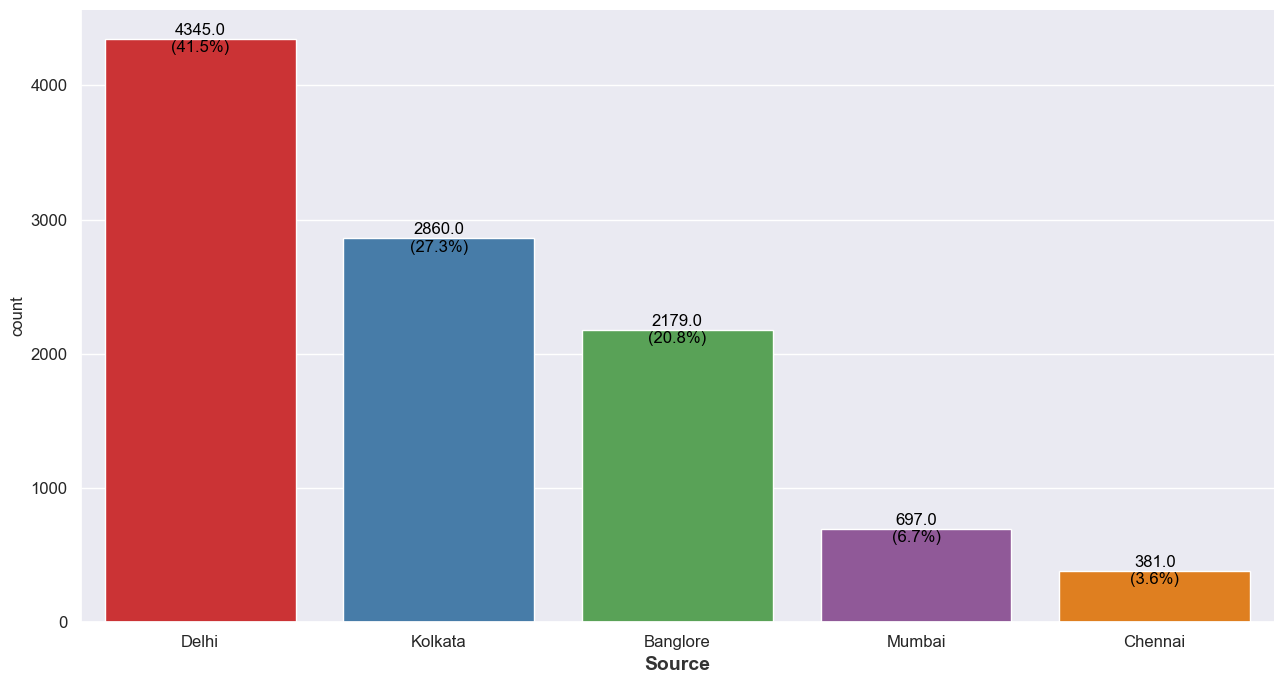

In [35]:
count_plot(dataset, x_column = 'Source')

### Insights:

###### From 'Delhi' majority of the flights departs, followed by 'kolkata'.

#### 4) Analysing by Destination

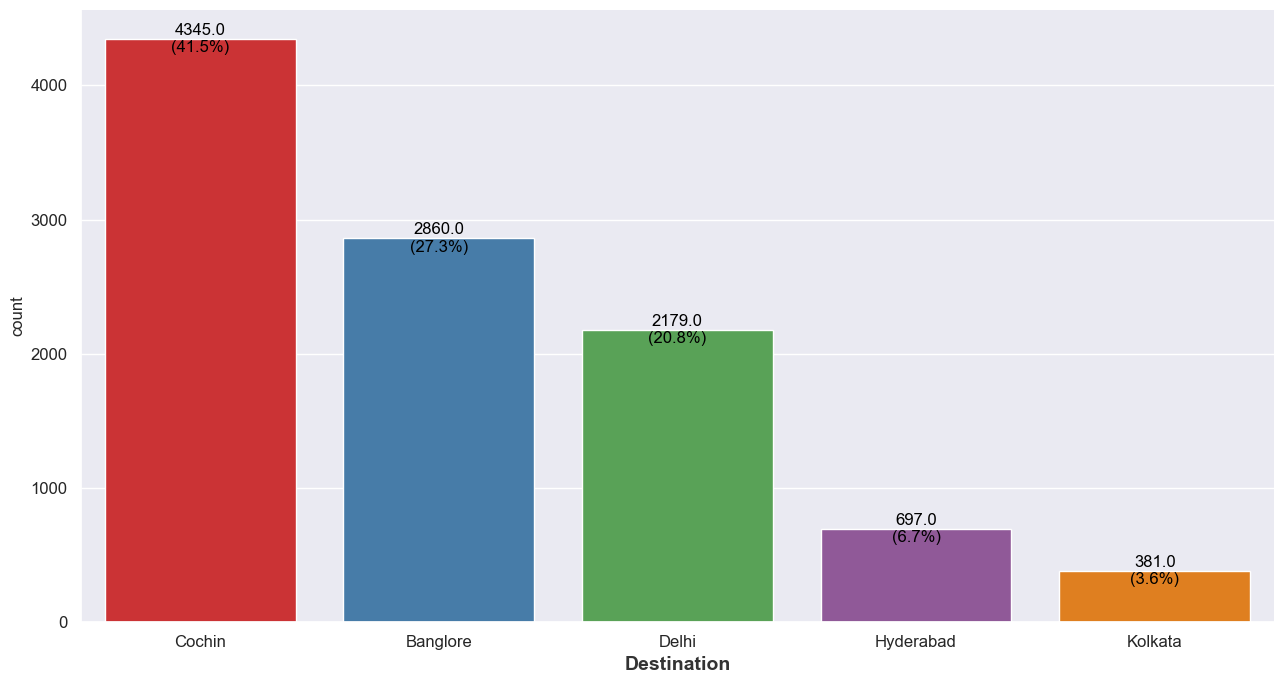

In [36]:
count_plot(dataset, x_column = 'Destination')

### Insights:

###### Majority of the flights lands in Cochin, may because Cochin is Rich in it's cultural heritage, landscape and beaches and people are preffeering it for their vacations.

#### 5) Analyzing by Departure Time

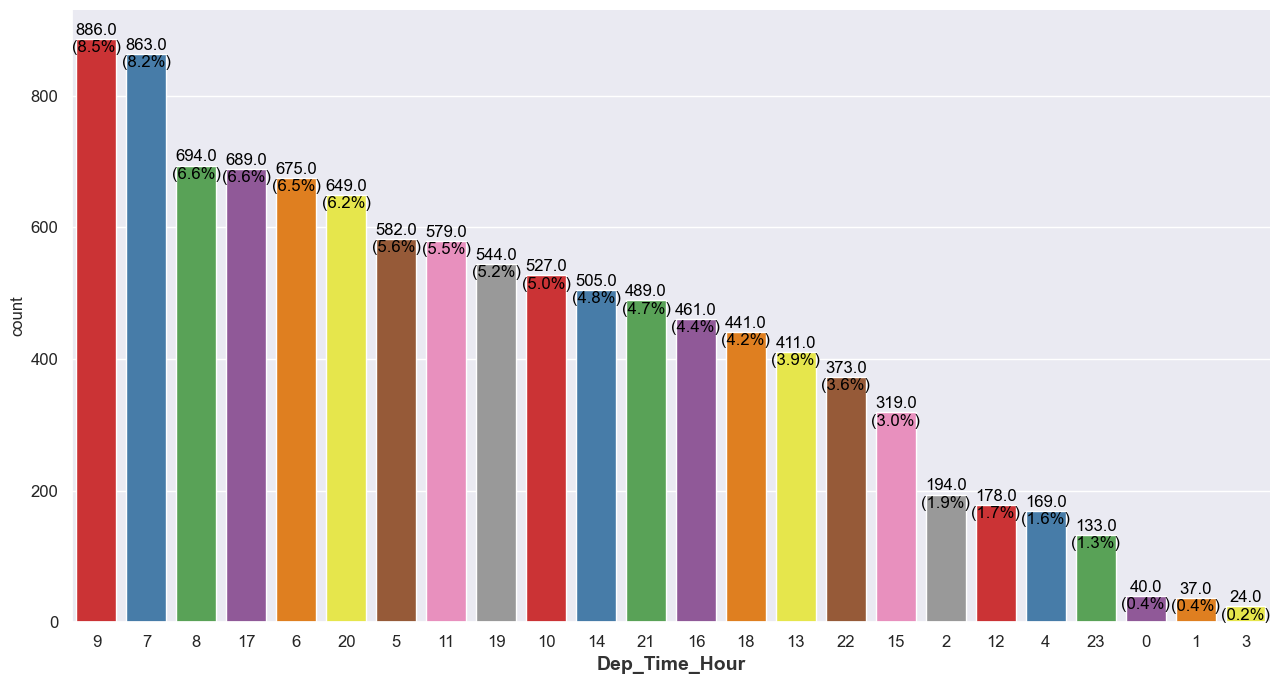

In [37]:
count_plot(dataset, x_column = 'Dep_Time_Hour')

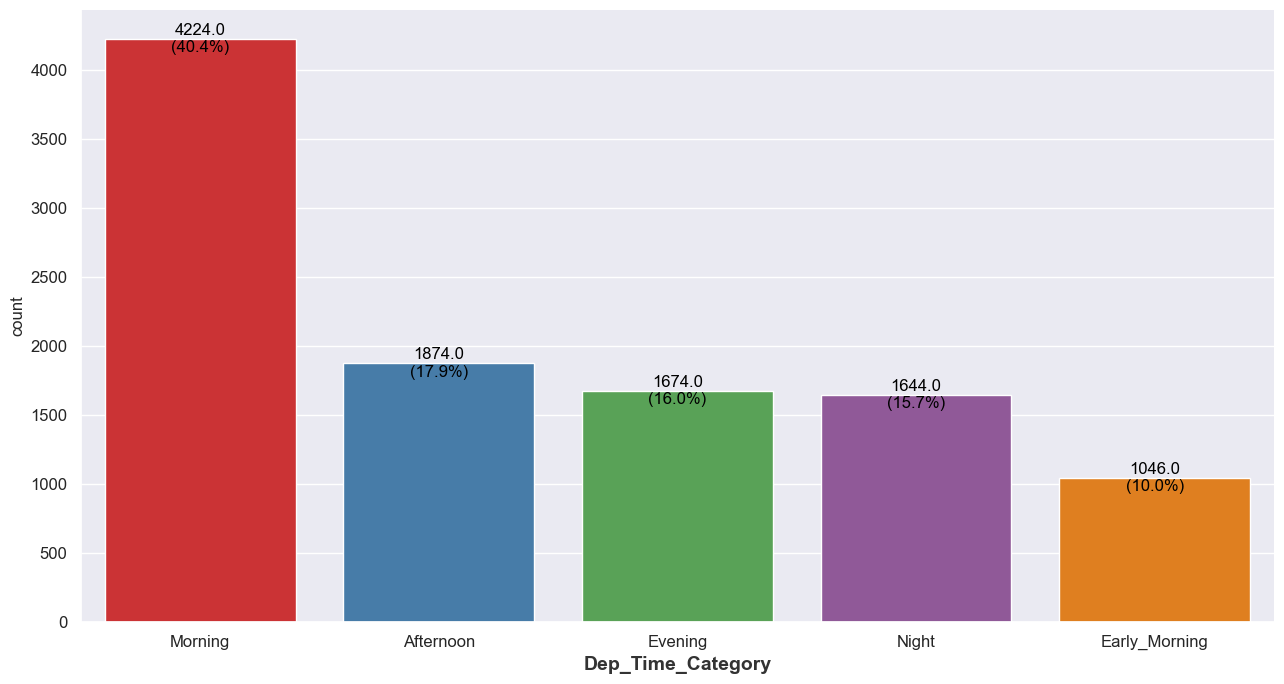

In [38]:
count_plot(dataset, x_column = 'Dep_Time_Category')

### Insights:

In [39]:
# As we can see, Majority of the flights departs between 06:00 AM to 12:00 PM in the MOrning.

#### 6) Analyzing by Arrival TIme

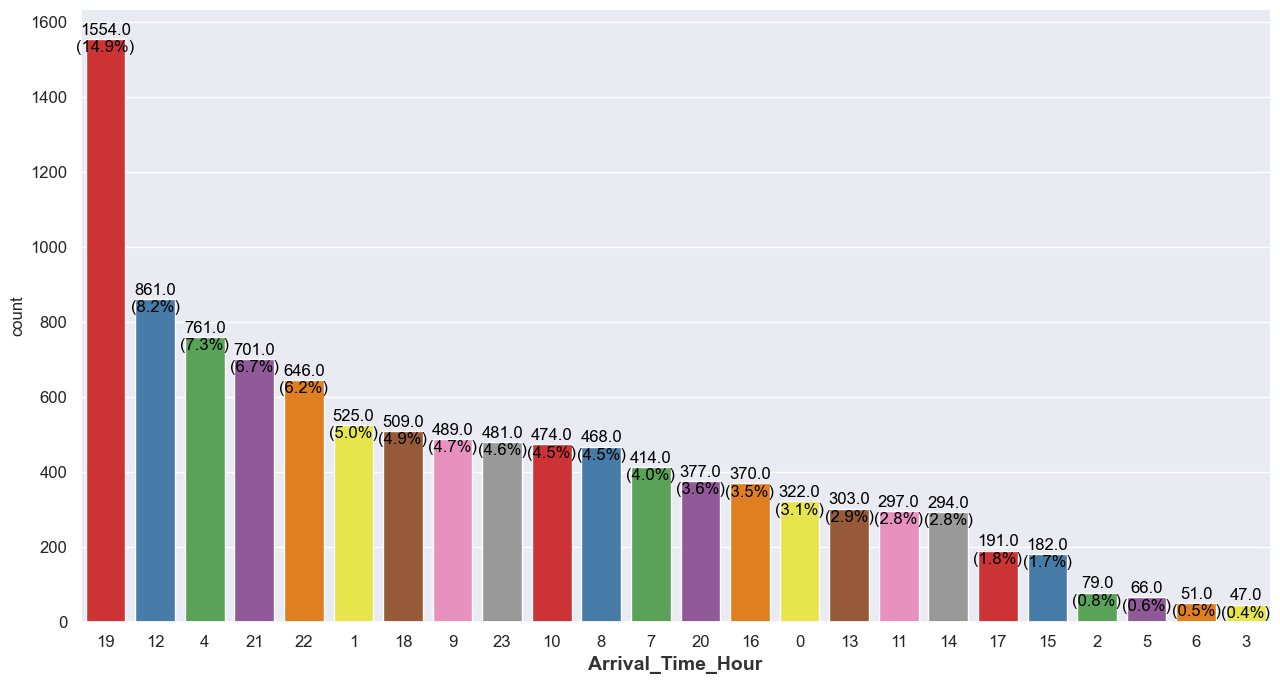

In [40]:
count_plot(dataset, x_column = 'Arrival_Time_Hour')

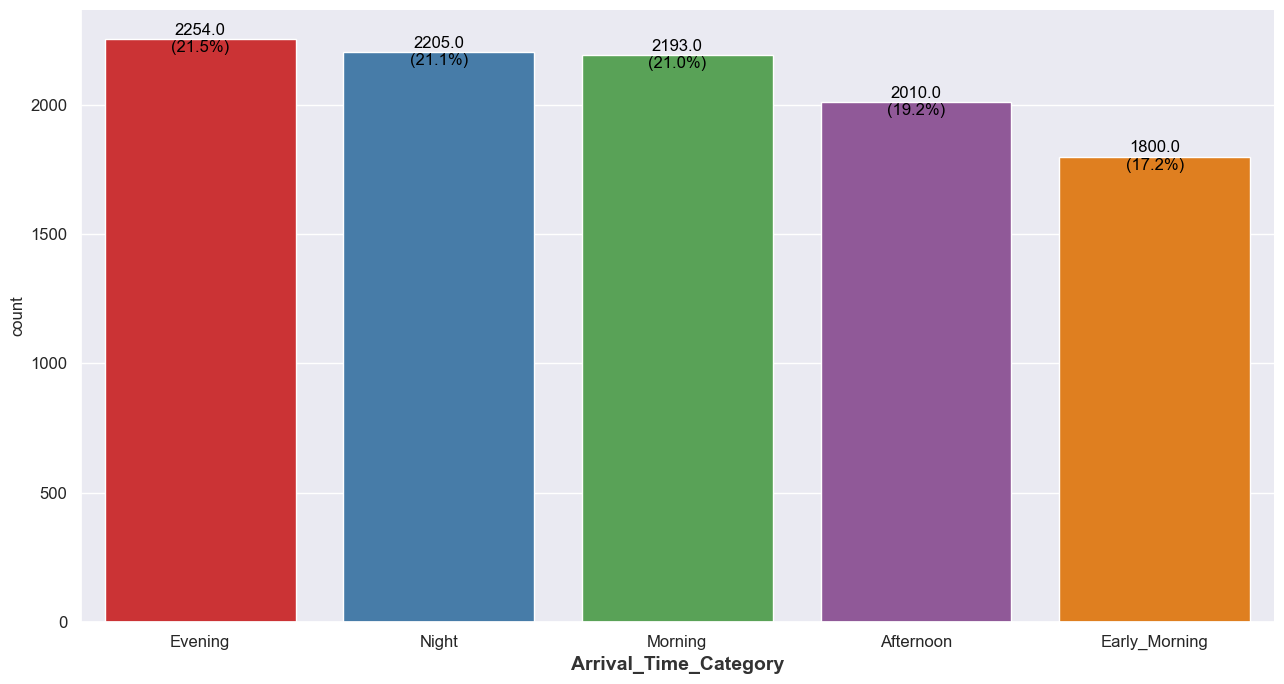

In [41]:
count_plot(dataset, x_column = 'Arrival_Time_Category')

### Insights:

###### We can see that, Majority of flights lands in Evening time, but there is not a major flutuation betwwen Evening, Night, and Morning

#### 7) Analyzing by Month

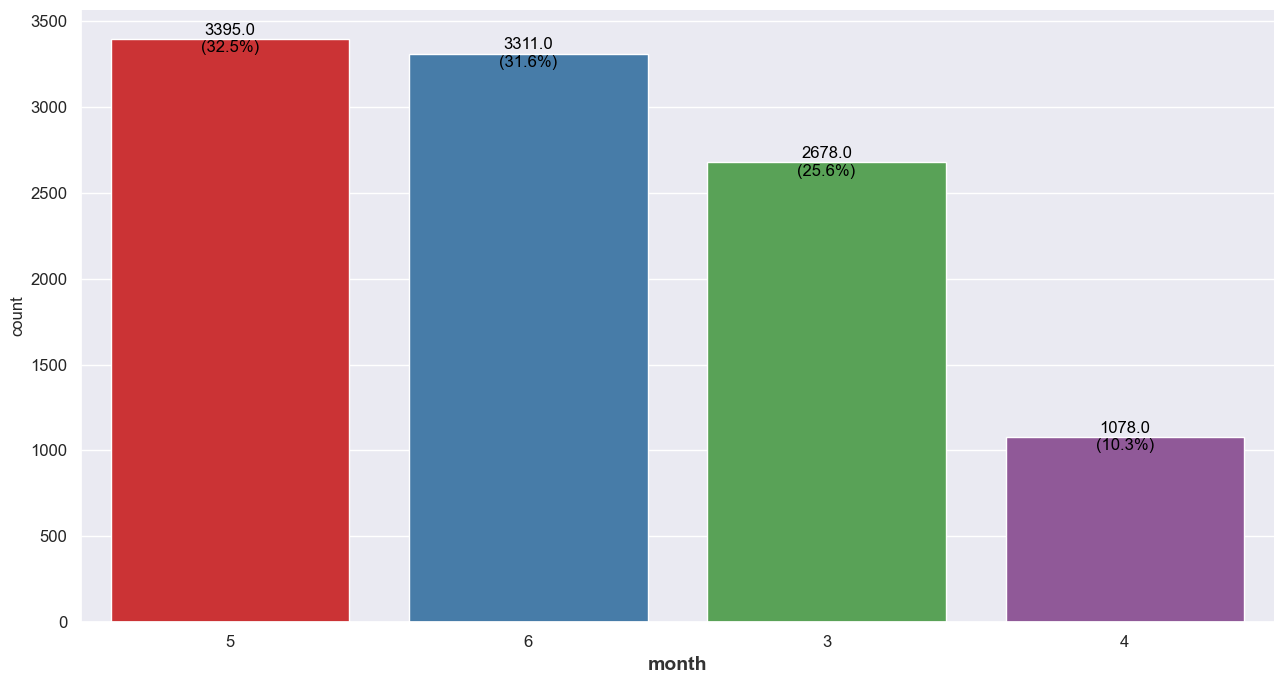

In [42]:
count_plot(dataset, x_column = 'month')

#### Insights:

###### Highest number of are in May(32.5%), followed by June, March and Aplril.

###### From this, one more think we can say is that most of the people flew/travel in summer season, may be for vacantions. 

#### 8) Analyzing by Weekday

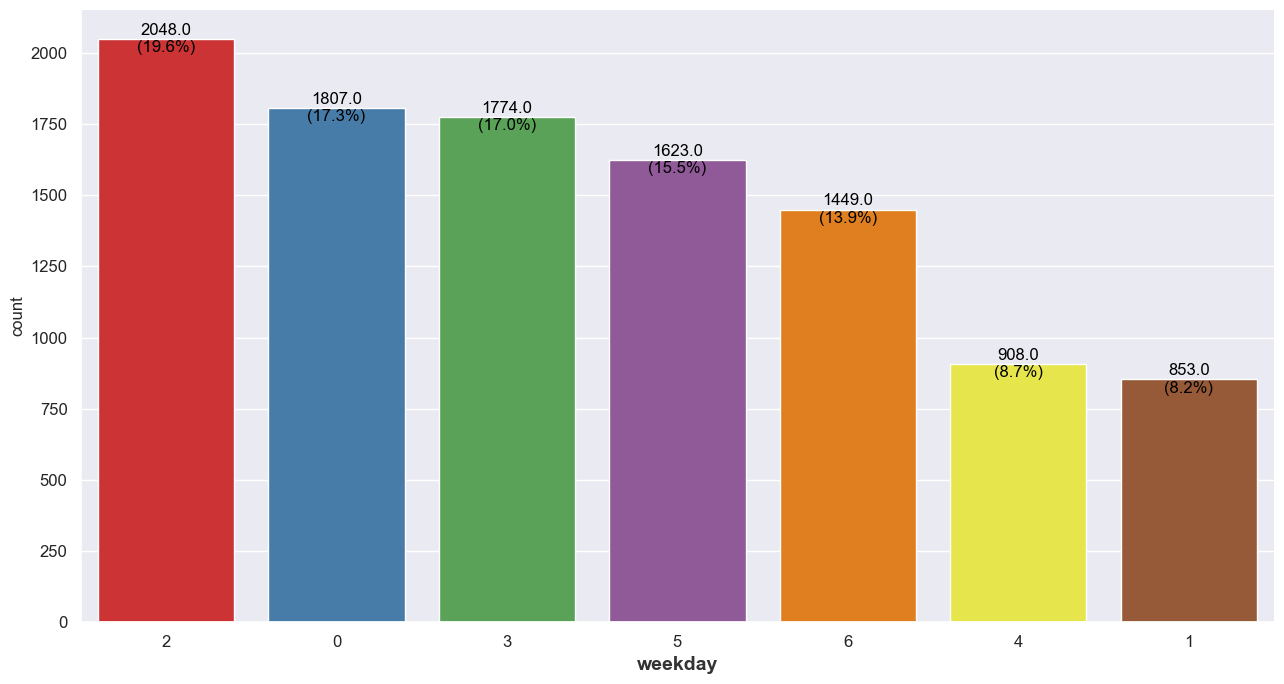

In [43]:
count_plot(dataset, x_column = 'weekday')

### Insights:

###### So, Maximum number of flights are on Tuesday(19.6%), followed by Sunday and Wednesday.

#### 9) Analyzing by Day

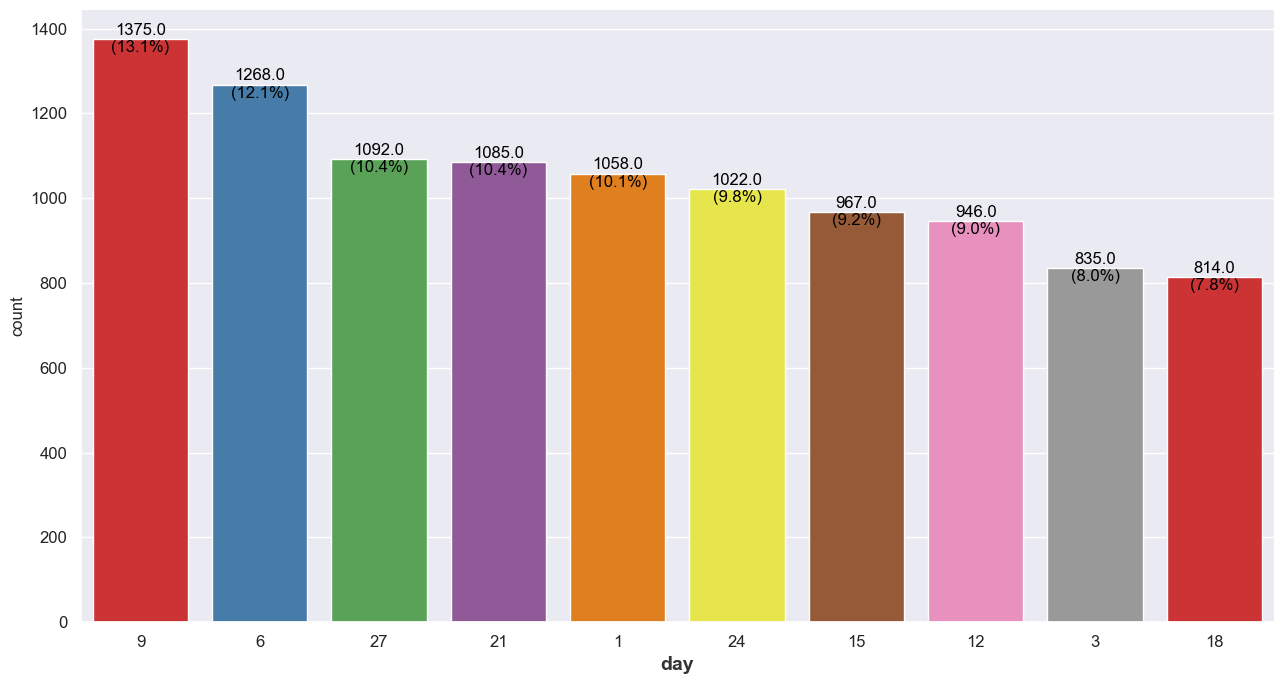

In [44]:
count_plot(dataset, x_column = 'day')

### Insights:

###### Majority of the flights are on 9th and 6th day of the month.

#### 10) Analyzing by Price

In [45]:
import matplotlib.ticker as ticker
def dist_box_plot(dataset, col):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[col], kde=True)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    # Rotate x-axis labels by 90 degrees and center-align
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=dataset, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

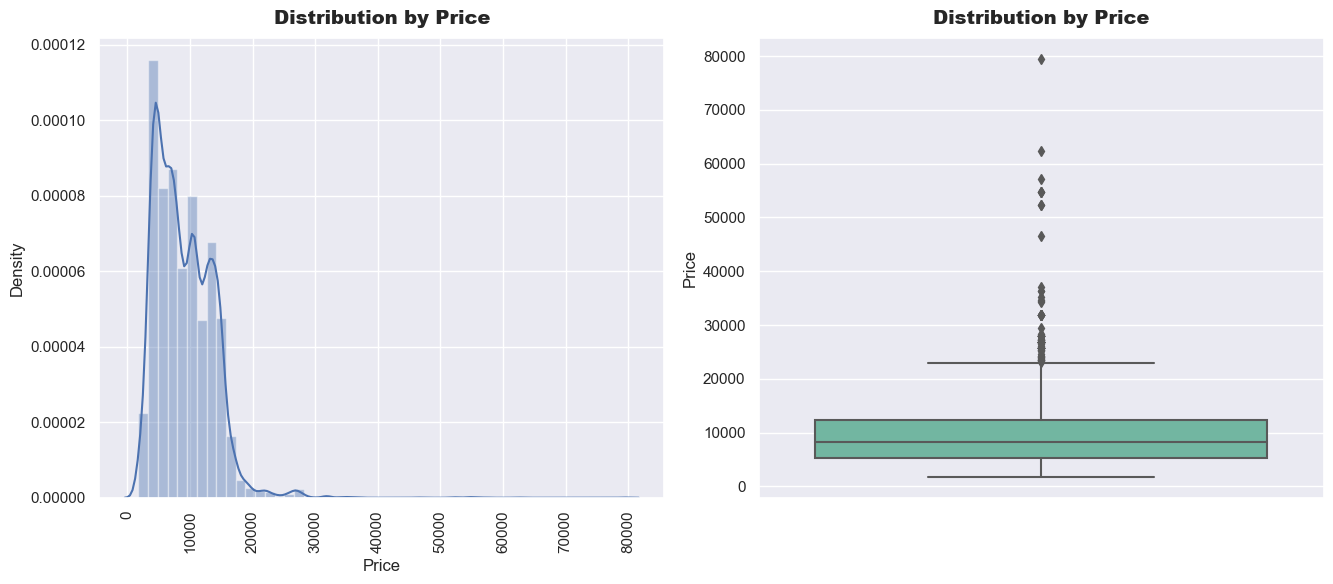

In [46]:
dist_box_plot(dataset, 'Price')

### Insights:

###### from distplot, we can say that the 'Price' variable is Right-skewed nad most of the Price ranges between 0 to 10,000.

###### Ffrom Boxplot, we can say that therre are outlieers present in 'Price' variable.

### Bivariate Analysis

#### 1) Analyzing  Price by  Airlines

Text(0.5, 1.0, 'Price depending on the Airline')

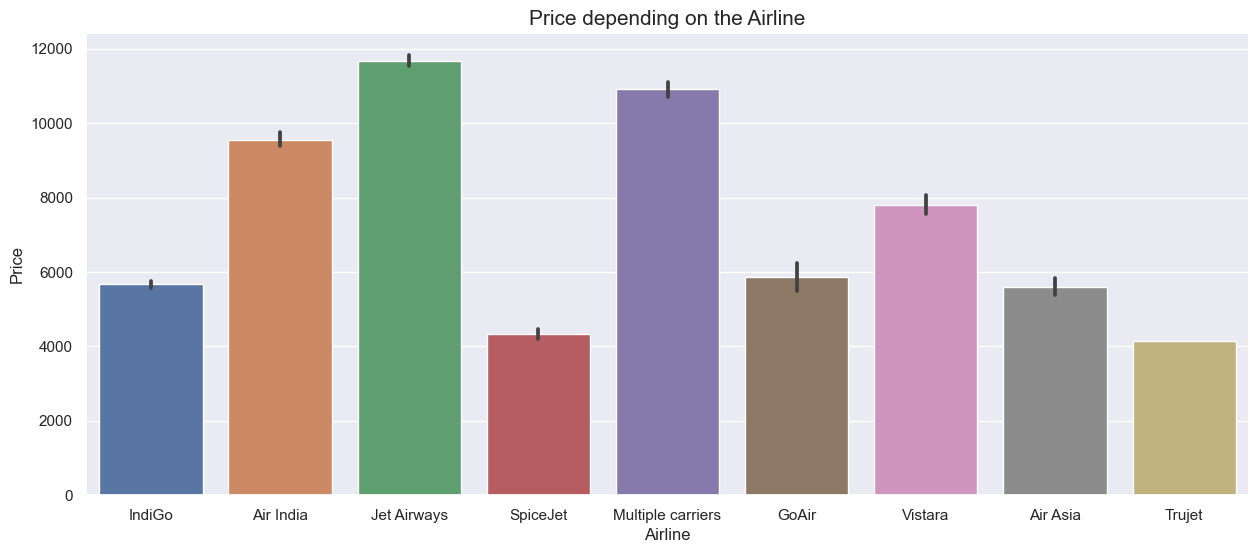

In [47]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Airline", y="Price", data= dataset)
plt.title("Price depending on the Airline",fontsize=15)

#### Insight: 

###### From rhis, we can say that 'Jet Airways' has highest price and 'Trujet' has the lowest.

#### 2) Analyzing Average Price based on Duration

Text(0.5, 1.0, 'Average Price Baaed on Duration')

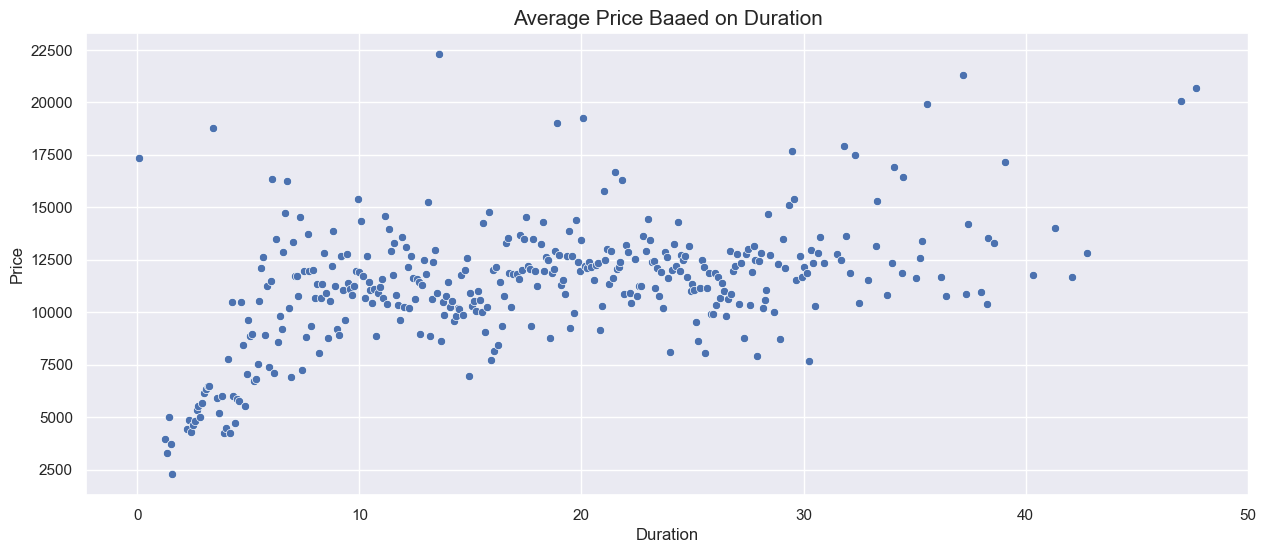

In [48]:
dataset_temp = dataset.groupby(['Duration'])['Price'].mean().reset_index()

plt.figure(figsize = (15,6))
ax = sns.scatterplot(x = 'Duration', y = 'Price', data = dataset_temp)
plt.title("Average Price Baaed on Duration", fontsize = 15)

### Insights:

###### The price of flights increases sharply as the duration of the flight extends, particularly up to 10 hours.

###### For the flights having Duration beyond 10 hours, the increase in price is stable.

#### 3) Analyzing flight Price based on Arrival and Departure Time

Text(0.5, 1.0, 'Airline Prices based on the Arrival Time')

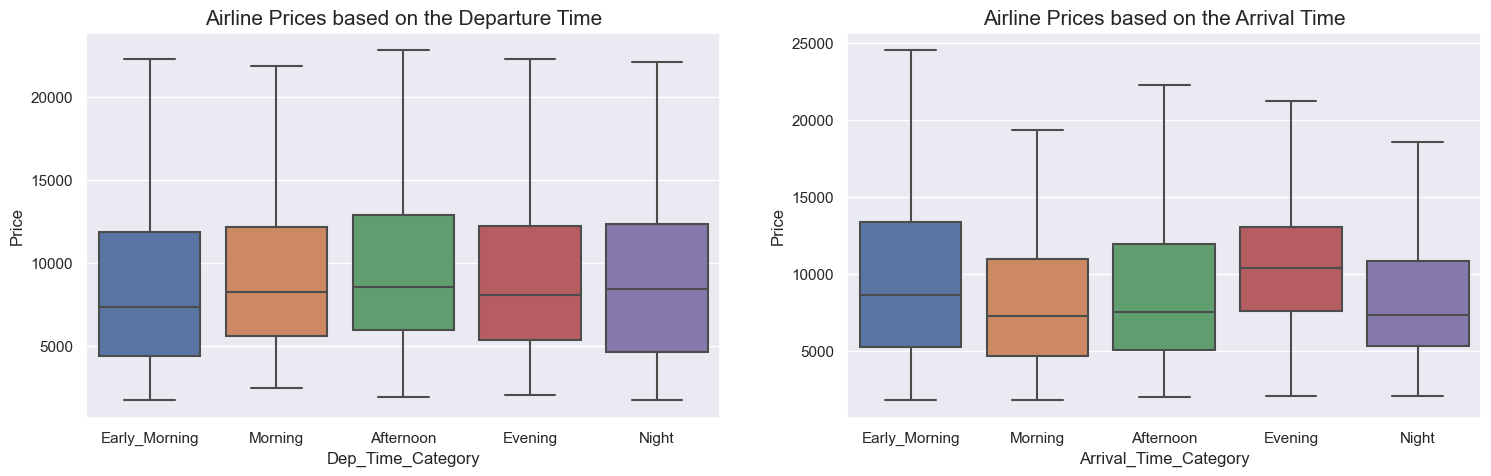

In [49]:
flight_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night"]

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Price", x="Dep_Time_Category",showfliers=False, order = flight_order)
plt.title("Airline Prices based on the Departure Time", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="Price", x="Arrival_Time_Category",showfliers=False, order = flight_order)
plt.title("Airline Prices based on the Arrival Time", fontsize=15)

### Insight: 

###### Flights Departuring in 'Early Morning' and Flights Arriving in 'Morning' have cheaper prices compare to others.

###### Afternoon Departure flights and Evening Arrival fights are costly.

#### 4) Analyzing flight Price based on Source and Destination city.

Text(0.5, 1.0, 'Airline Prices based on the Destination City')

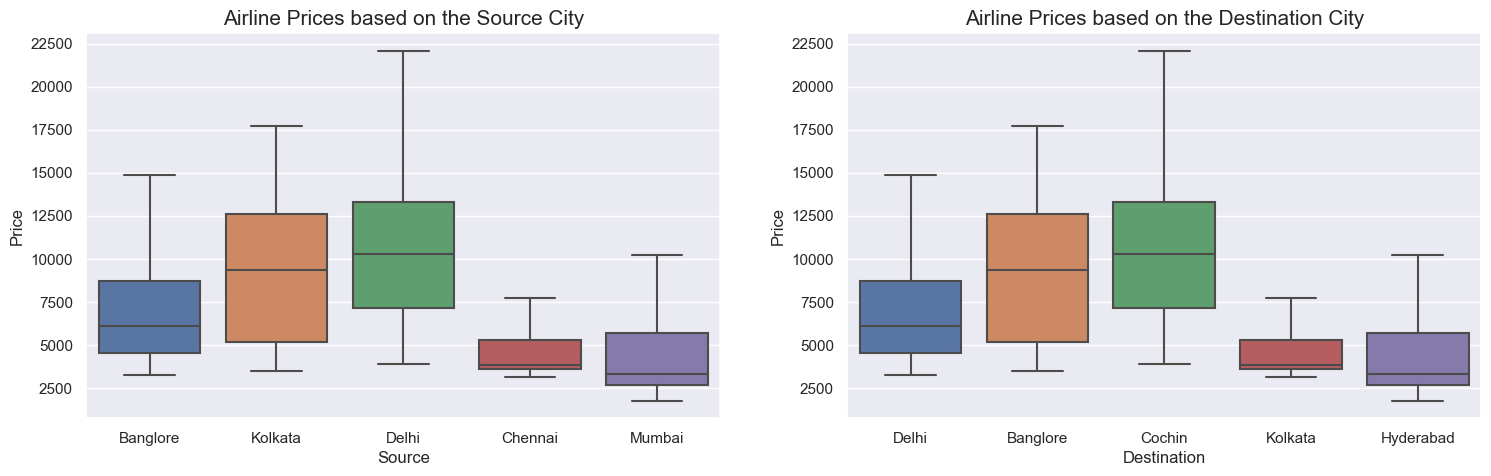

In [50]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Price", x="Source",showfliers=False)
plt.title("Airline Prices based on the Source City", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="Price", x="Destination",showfliers=False)
plt.title("Airline Prices based on the Destination City", fontsize=15)

### Insights:

###### Ticket price is low for flight having source city as Mumbai.

###### Ticket price is low for flight having destination city as Kilkata

###### Ticket price is high for flight having source city as Delhi.

###### Ticket price is high for flight having destination city as Cochin.

#### 4) Analyzing flight Price based on Number of Stops

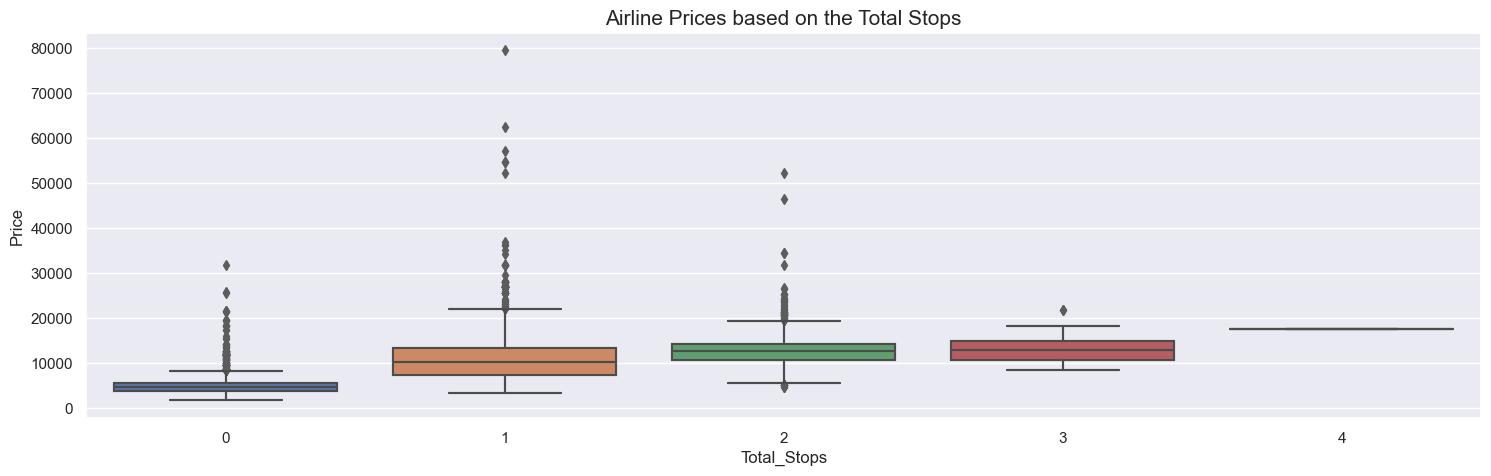

In [51]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Total_Stops',y='Price',data=dataset,palette='hls')
sns.boxplot(x="Total_Stops" ,y="Price", data=dataset,showfliers=False)
plt.title("Airline Prices based on the Total Stops", fontsize=15)
plt.show()

### Insights:

###### Flight with 0 stops are cheaper.

###### Flight with 4 stops are costly.

###### From this, we can say that As the number of stops increases, price of flight also increases.

#### 5) Analyzing flight Price based on Airlines

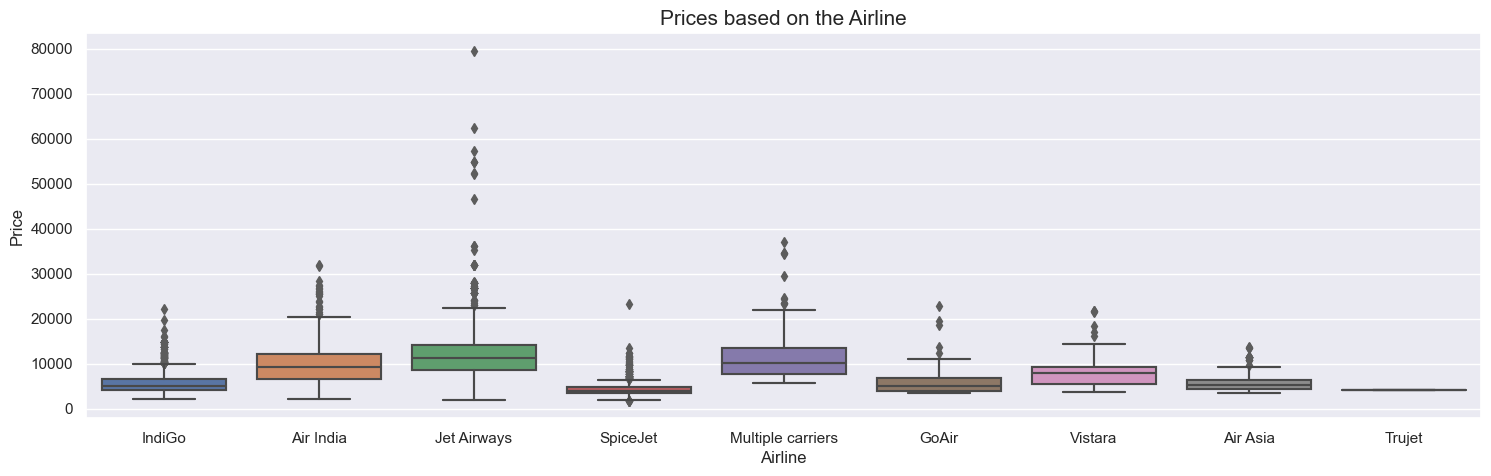

In [52]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Airline', y='Price', data = dataset,palette='hls')
sns.boxplot(x='Airline' ,y='Price', data = dataset ,showfliers=False)
plt.title("Prices based on the Airline", fontsize=15)
plt.show()

### Insights:

###### Jet Airways has the maximum price range, followed by Air India

###### Indigo and GoAir has the same price range.

#### 6) Analyzing Average flight Price of different Airlnes from Source city to Destination city

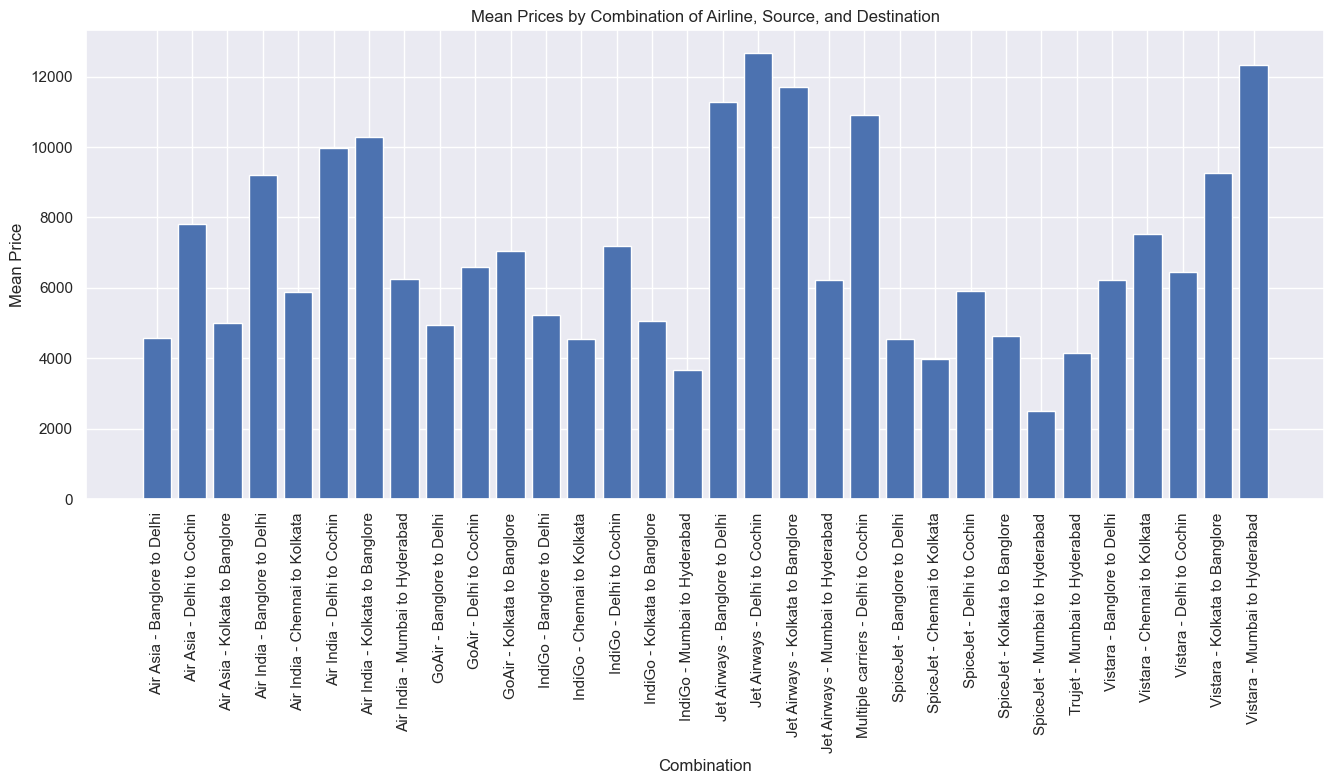

In [53]:
avg_prices = dataset.groupby(['Airline', 'Source', 'Destination'], as_index=False)['Price'].mean()

# Bar plot
plt.figure(figsize=(13.5, 8)) 
plt.bar(avg_prices.index, avg_prices['Price'])
plt.xlabel('Combination')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Combination of Airline, Source, and Destination')
plt.xticks(avg_prices.index, [f'{row["Airline"]} - {row["Source"]} to {row["Destination"]}' for _, row in avg_prices.iterrows()], rotation=90)
plt.tight_layout()
plt.show()

### Insights:

###### Airline: Jet Airways - "Delhi to Cochin" and Airline: Vistara - "Mumbai to Hyderabad" flight has the highest average price.

###### SpiceJet - "Mumbai to Hyderabad" has the lowest average price. 

## Handling Outliers Using IQR Method



In [54]:
# As we have earlier analyzed that their are outliers present in Price variable.
# So, handling it by using IQR method
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

dataset['Price'] = np.where(dataset['Price'] > upper_limit, upper_limit, np.where(dataset['Price'] < lower_limit, lower_limit, dataset['Price']))

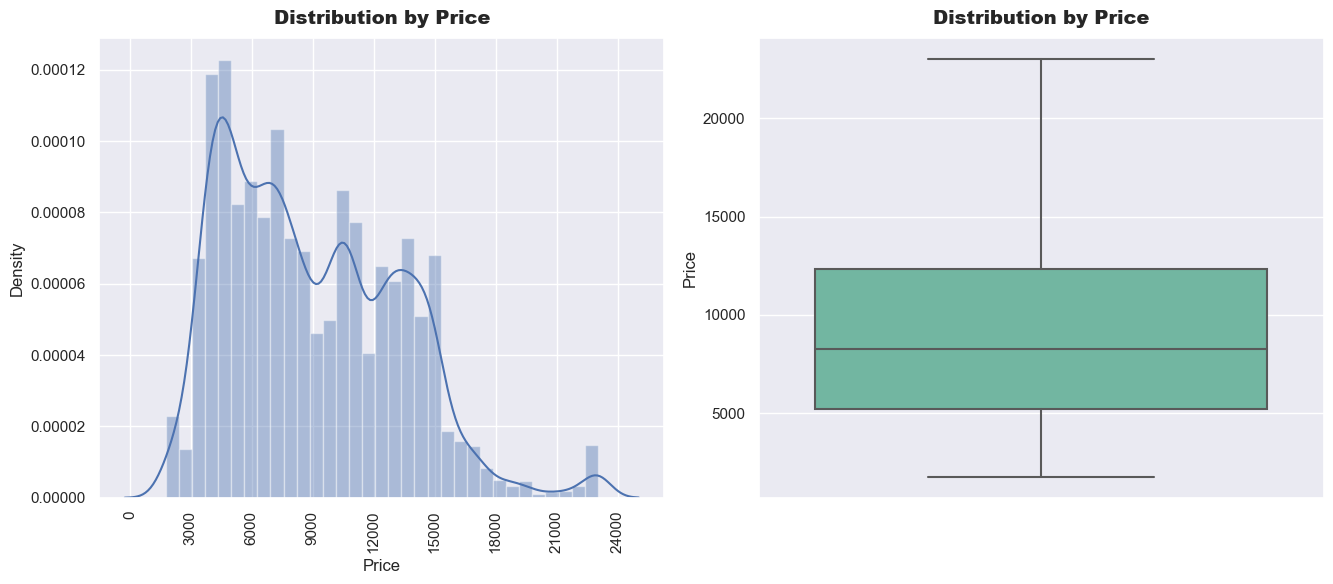

In [55]:
dist_box_plot(dataset, 'Price')

###### - We have removed the outliers using IQR method.

In [56]:
# Dropping the "Dep_Time_Category" and "Arrival_TIme_Category" as we have extracted necessary info from it.

dataset = dataset.drop(['Dep_Time_Category', 'Arrival_Time_Category'], axis = 1)

In [57]:
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,Delhi,2.83,0,3897.0,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,7.42,2,7662.0,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,19.00,2,13882.0,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5.42,1,6218.0,12,5,6,18,5,23,30
4,IndiGo,Banglore,Delhi,4.75,1,13302.0,1,3,4,16,50,21,35


In [58]:
dataset.shape

(10462, 13)

## Encoding

In [59]:
# Performing One-hot Encoding on Nominal column ('Airline', 'Source', 'Destination')

dataset_new  = pd.get_dummies(dataset, prefix = ['Airline', 'Source', 'Destination'], columns = ['Airline', 'Source', 'Destination'], drop_first = True)

In [60]:
dataset_new.head()

,Duration,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,2.83,0,3897.0,24,3,6,22,20,1,10,...,False,False,False,False,False,False,False,True,False,False
1,7.42,2,7662.0,1,5,2,5,50,13,15,...,False,False,False,False,True,False,False,False,False,False
2,19.00,2,13882.0,9,6,6,9,25,4,25,...,False,False,False,True,False,False,True,False,False,False
3,5.42,1,6218.0,12,5,6,18,5,23,30,...,False,False,False,False,True,False,False,False,False,False
4,4.75,1,13302.0,1,3,4,16,50,21,35,...,False,False,False,False,False,False,False,True,False,False


#### Checking for Correlation

<Axes: title={'center': 'Correlation Plot'}>

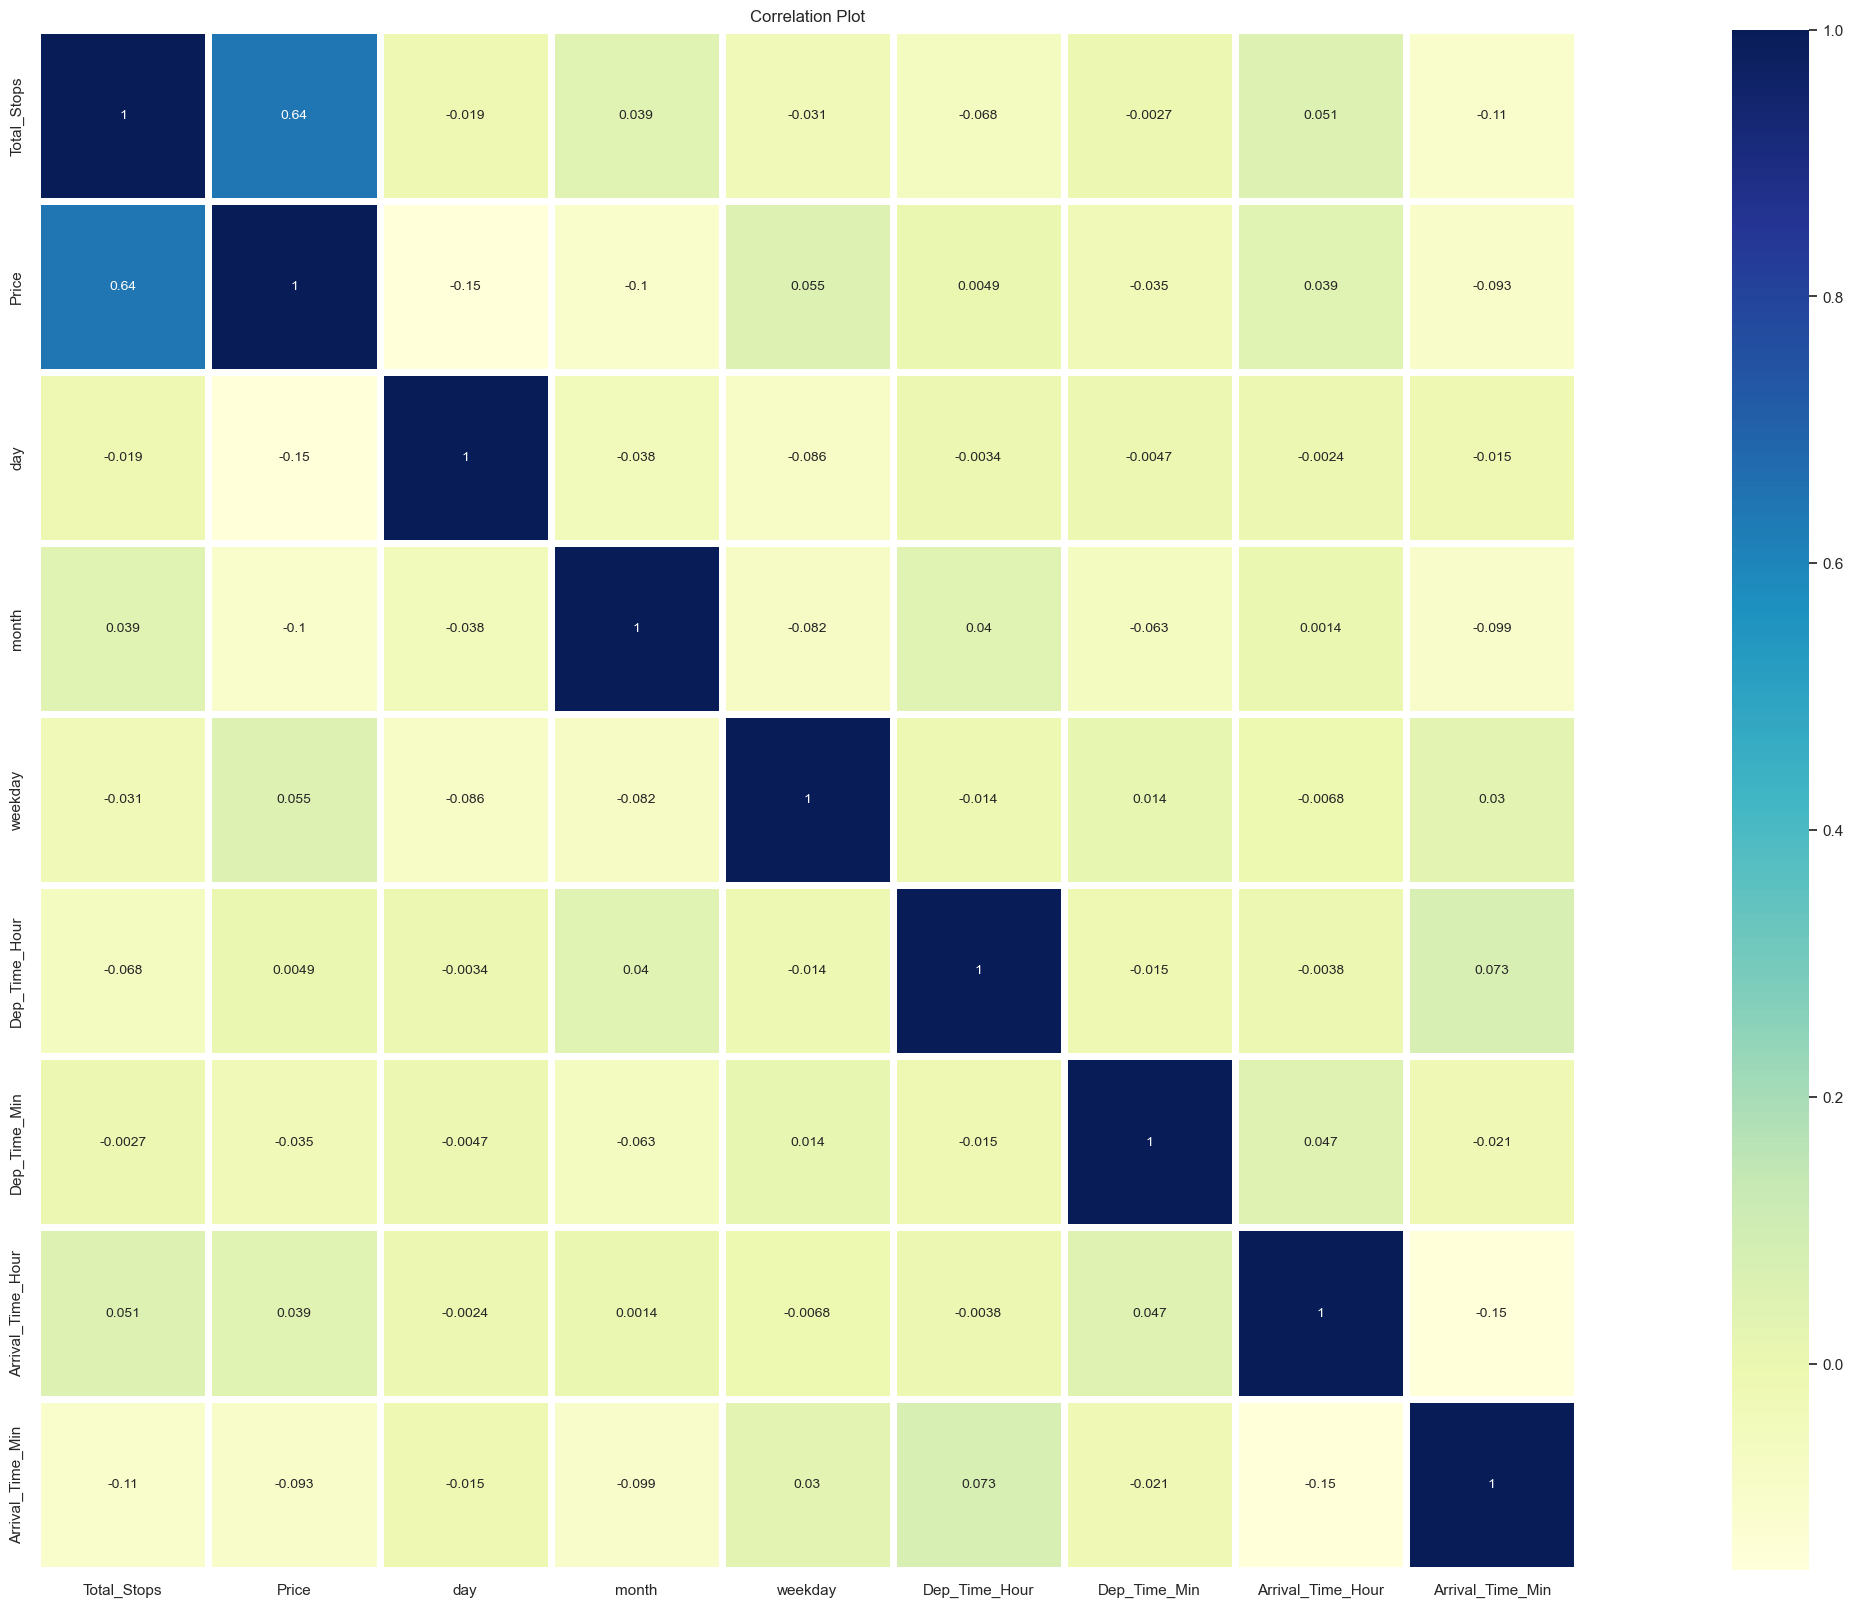

In [71]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
numerical_columns = dataset.select_dtypes(include=['int', 'float']).columns
dataset_numerical = dataset[numerical_columns]
sns.heatmap(dataset_numerical.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

### Insights:

###### As we can see that Total_stops and Duration is highly correlated with each other, so there is problem of multicollinearity so we will drop one of them.

###### Also Total_stops has a very good correlation(0.64) with Price.

###### So, we will drop Duration.

In [66]:
dataset_new = dataset_new.drop(['Duration'], axis = 1)

In [73]:
dataset_new.head()

,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Airline_Air India,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897.0,24,3,6,22,20,1,10,False,...,False,False,False,False,False,False,False,True,False,False
1,2,7662.0,1,5,2,5,50,13,15,True,...,False,False,False,False,True,False,False,False,False,False
2,2,13882.0,9,6,6,9,25,4,25,False,...,False,False,False,True,False,False,True,False,False,False
3,1,6218.0,12,5,6,18,5,23,30,False,...,False,False,False,False,True,False,False,False,False,False
4,1,13302.0,1,3,4,16,50,21,35,False,...,False,False,False,False,False,False,False,True,False,False


## Feature Scaling

In [74]:
# spliting the data into Independent and Dependent variable.
x = dataset_new.drop(['Price'], axis = 1)  #  x is our independent variable
y = dataset_new['Price'] #  y is our dependent variable

In [75]:
x.head()

,Total_Stops,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Airline_Air India,Airline_GoAir,...,Airline_Trujet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,6,22,20,1,10,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2,1,5,2,5,50,13,15,True,False,...,False,False,False,False,True,False,False,False,False,False
2,2,9,6,6,9,25,4,25,False,False,...,False,False,False,True,False,False,True,False,False,False
3,1,12,5,6,18,5,23,30,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1,1,3,4,16,50,21,35,False,False,...,False,False,False,False,False,False,False,True,False,False


In [76]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
dataset_scaled = scaler.fit_transform(dataset_new)

#### Spliting the Data into Training and Testing (Unscaled)

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [83]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(8369, 24) (8369,) (2093, 24) (2093,)


#### Spliting the Data into Training and Testing (Scaled)

In [85]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [86]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(8369, 24) (8369,) (2093, 24) (2093,)


#### Importing required Libraries for Model Building

In [90]:
# !pip install xgboost

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from scipy.stats import randint

In [248]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [192]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [193]:
# Creating function for model building
def predict(ml_model):
    print('Model Name: {}'.format(ml_model))
    model = ml_model.fit(x_train1, y_train1)
    print('Training Score: {}'.format(model.score(x_train1, y_train1)))
    pred_1 = model.predict(x_train1)
    pred = model.predict(x_test1)
    
    r2score = r2_score(y_test1, pred)
    adj_r2 = 1 - ((1 - r2score)*(x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))
    mae = mean_absolute_error(y_test1, pred)
    mse = mean_squared_error(y_test1, pred)
    rmse = np.sqrt(mse)
    
    r2_value.append(r2score)
    adjusted_r2_value.append(adj_r2)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    
    print('R squared {}'.format(r2score))
    print('Adjusted R squared {}'.format(adj_r2))
    print('MAE: {}'.format(mae))
    print('MSE: {}'.format(mse))
    print('RMSE: {}'.format(rmse))
    
    
    
    
     # Scatter plot.
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)    
    plt.scatter(y_train1, pred_1, color='blue', label='Train')
    plt.scatter(y_test1, pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    sns.distplot(y_test1-pred)
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

### Linear Regression

Model Name: LinearRegression()
Training Score: 0.6283913966790233
R squared 0.6166398199542826
Adjusted R squared 0.6121907656404058
MAE: 1945.2720583533273
MSE: 7023032.024488522
RMSE: 2650.100380077804


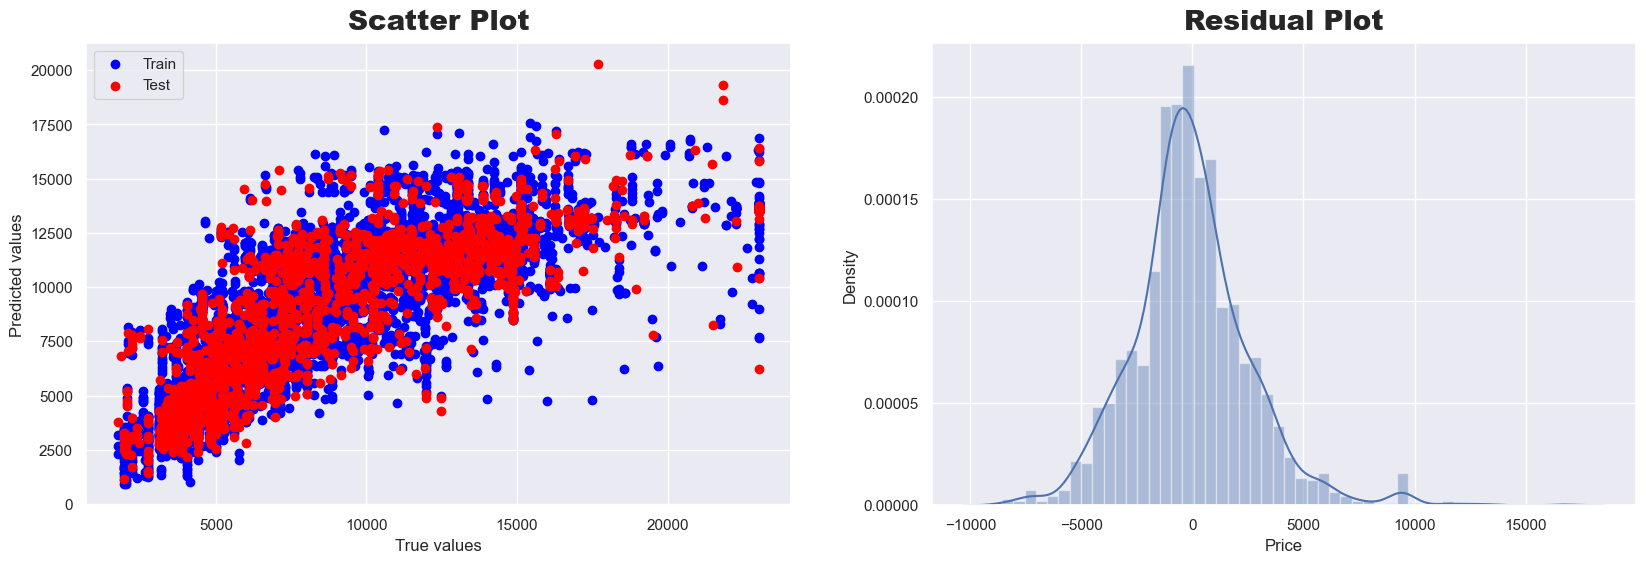

In [194]:
predict(LinearRegression())

### Lasso

Model Name: Lasso()
Training Score: 0.6290299654576714
R squared 0.6190284202151439
Adjusted R squared 0.6146070866006195
MAE: 1942.6737430627745
MSE: 6979273.655730113
RMSE: 2641.831496467955


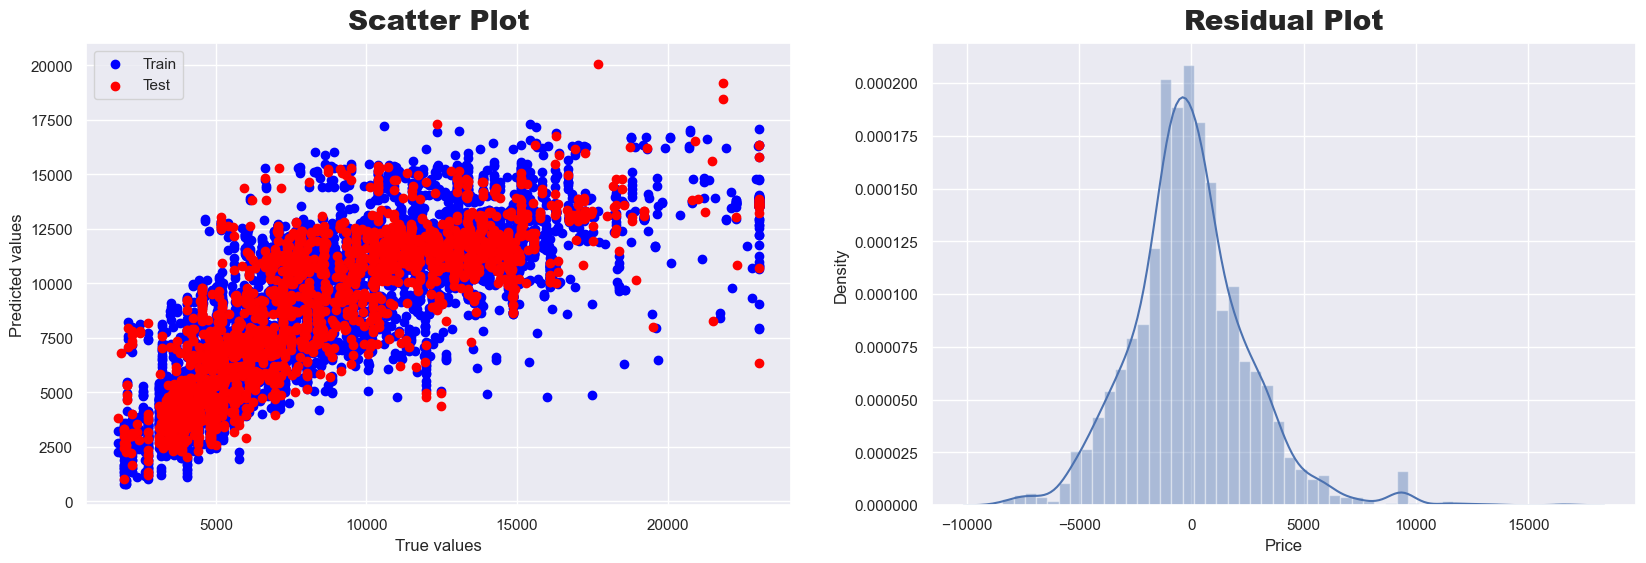

In [185]:
predict(Lasso())

### Ridge

Model Name: Ridge()
Training Score: 0.6290358719151448
R squared 0.6190167282019278
Adjusted R squared 0.6145952588967276
MAE: 1942.879933465667
MSE: 6979487.849554934
RMSE: 2641.872035045402


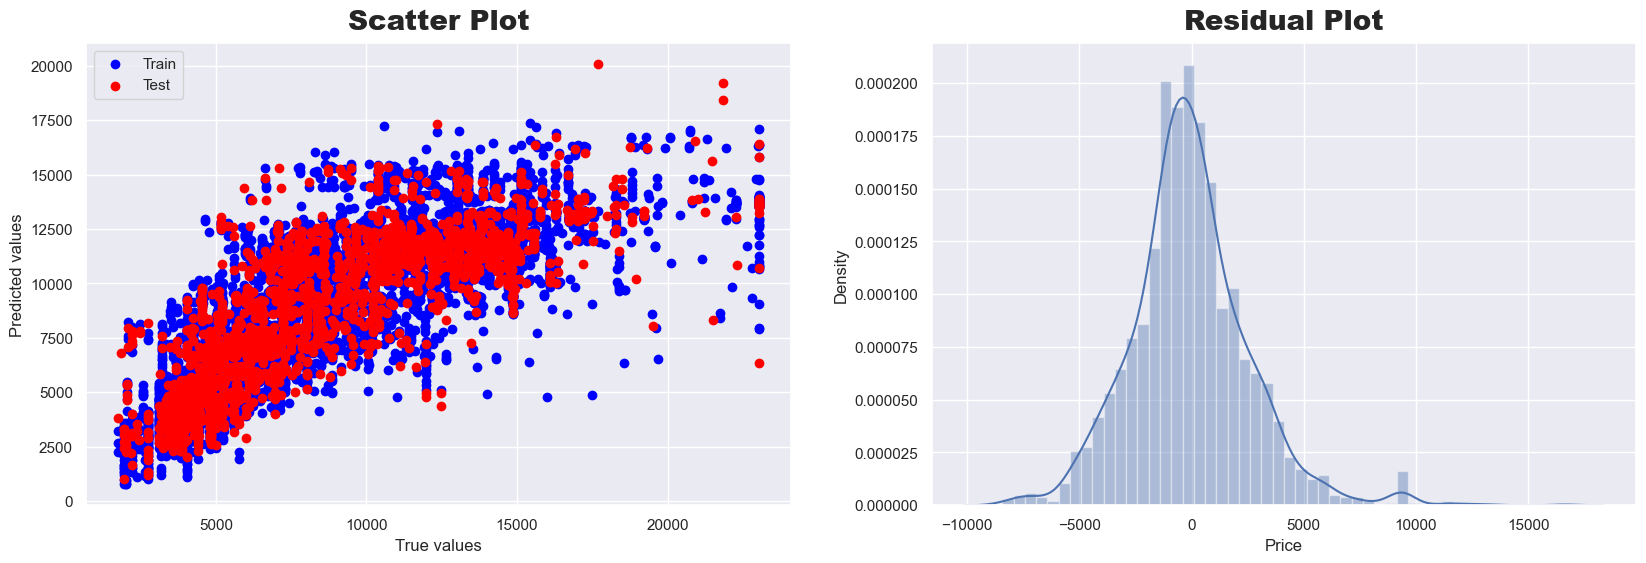

In [184]:
predict(Ridge())

### KNN

Model Name: KNeighborsRegressor()
Training Score: 0.8496141463392922
R squared 0.7765979875872278
Adjusted R squared 0.7740053143290524
MAE: 1376.579192546584
MSE: 4092651.1650818205
RMSE: 2023.030193813681


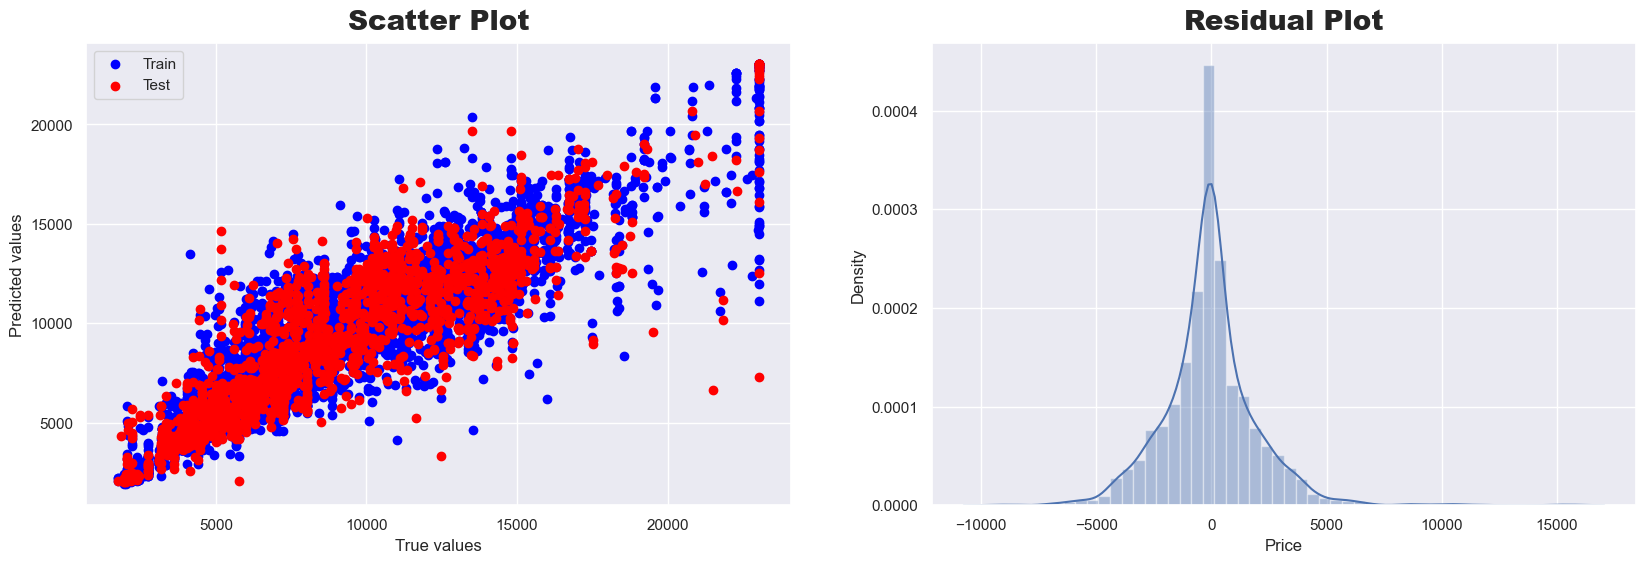

In [183]:
predict( KNeighborsRegressor())

### Decision Tree Regressor

Model Name: DecisionTreeRegressor()
Training Score: 0.9640053295432326
R squared 0.717555062149497
Adjusted R squared 0.7142771711879825
MAE: 1346.6707676381588
MSE: 5174298.080312351
RMSE: 2274.708350605051


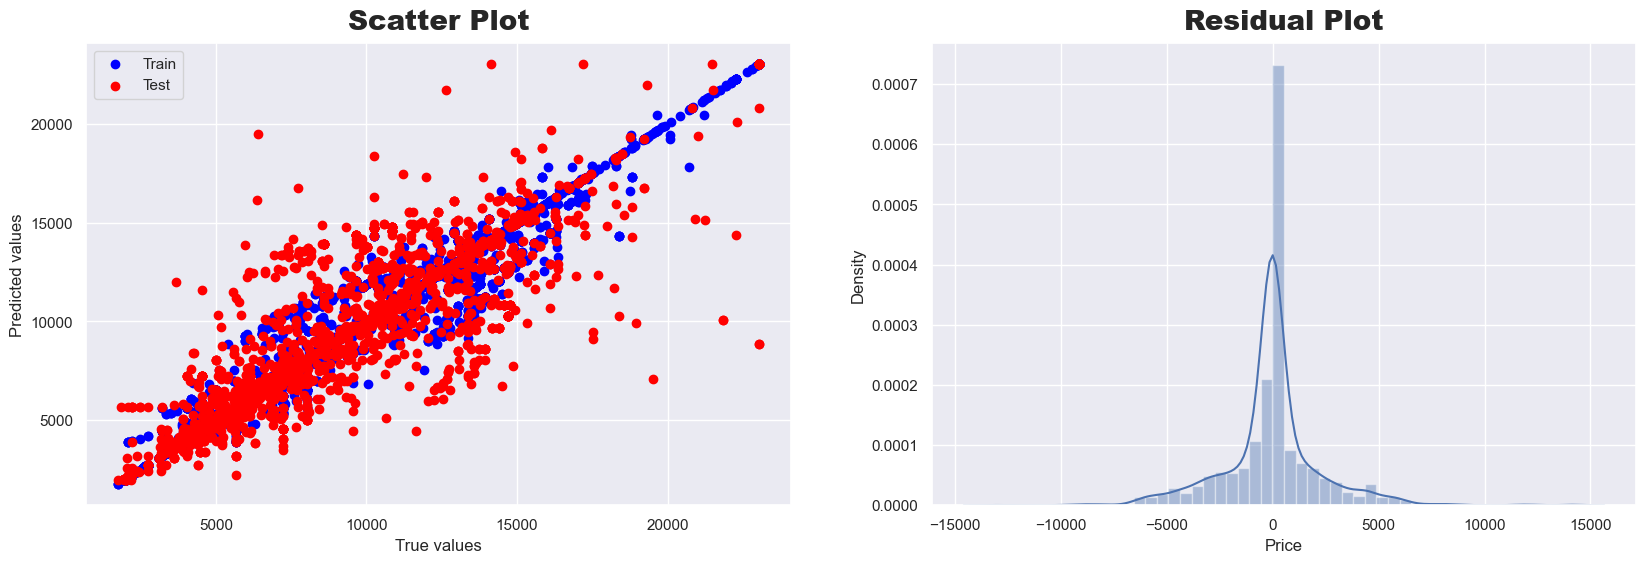

In [182]:
predict(DecisionTreeRegressor())  #OVERFITTING MODEL

### Random Forest Regressor

Model Name: RandomForestRegressor()
Training Score: 0.9519116144327208
R squared 0.8273306014243373
Adjusted R squared 0.8253267012474438
MAE: 1133.7504492517492
MSE: 3163246.4167286144
RMSE: 1778.5517751048503


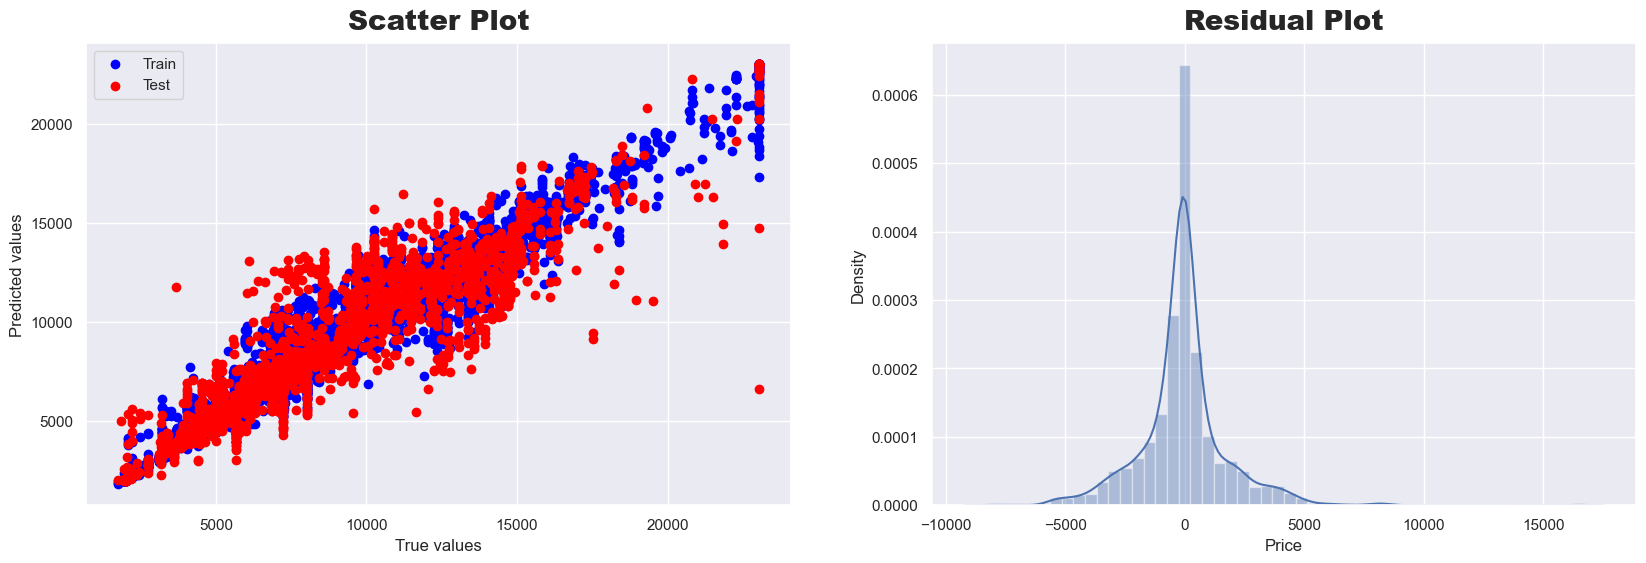

In [181]:
predict(RandomForestRegressor())

### AdaBoost

Model Name: AdaBoostRegressor()
Training Score: 0.6474192624080117
R squared 0.6369798034552867
Adjusted R squared 0.6327668031085396
MAE: 2085.5521991225974
MSE: 6650410.237092438
RMSE: 2578.8389319793587


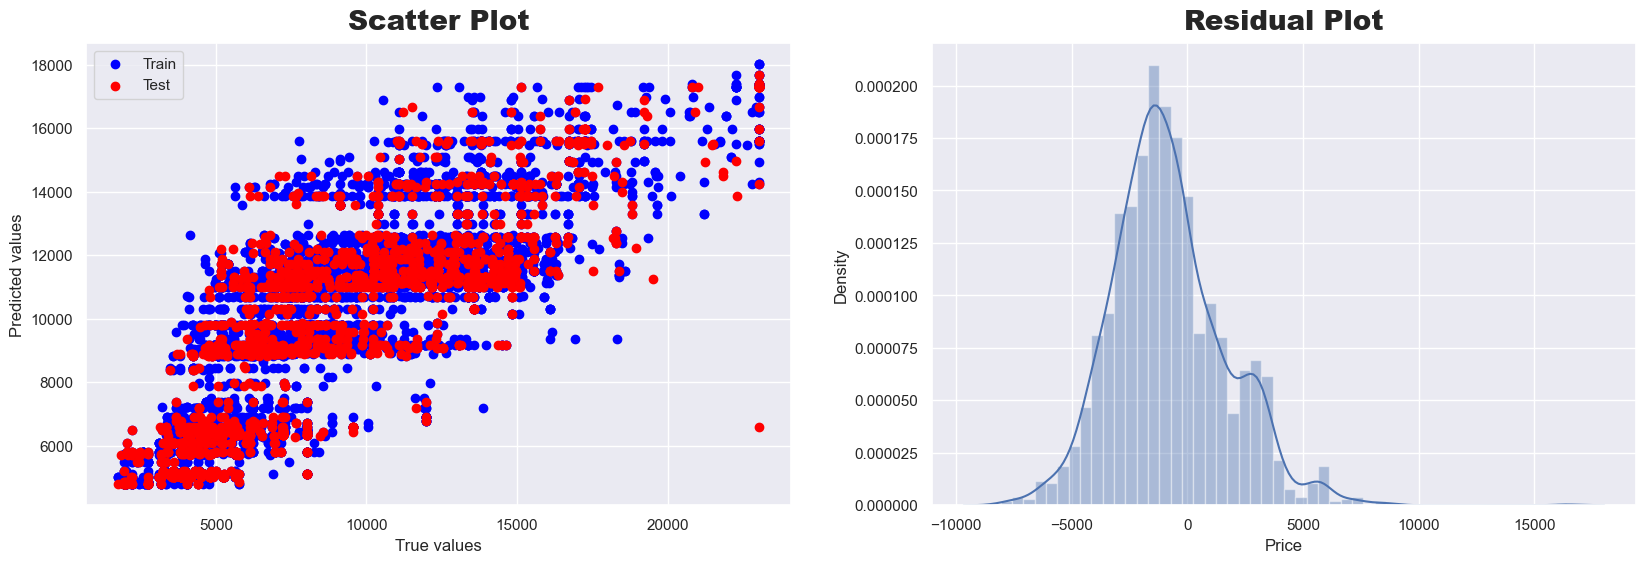

In [178]:
predict(AdaBoostRegressor())

### Gradient Boosting

Model Name: GradientBoostingRegressor()
Training Score: 0.7880220835172662
R squared 0.7754850983778867
Adjusted R squared 0.7728795095776301
MAE: 1505.859886969846
MSE: 4113038.9282448557
RMSE: 2028.0628511574428


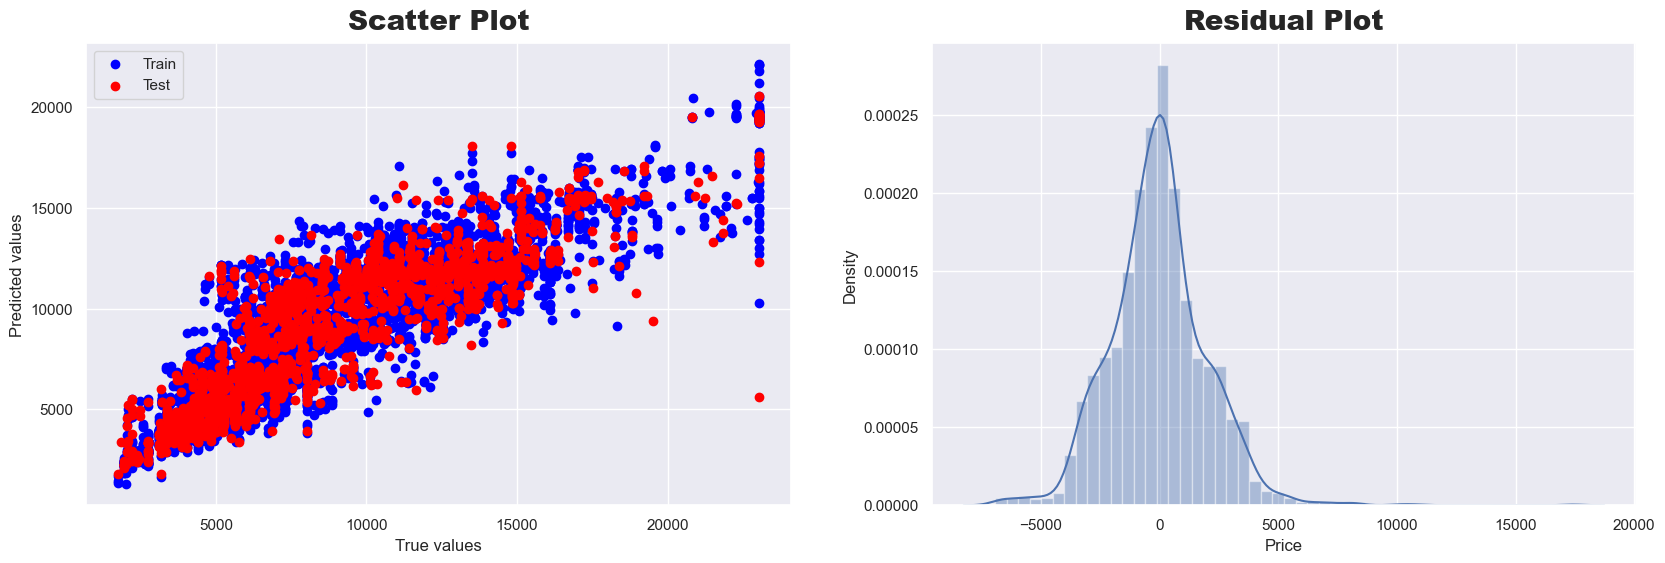

In [177]:
predict(GradientBoostingRegressor())

### XGBoost

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training Score: 0.9301704221835078
R squared 0.8667146666406376
Adjusted R squared 0.8651678349188655
MAE: 1067.910389250907
MSE: 2441743.3351210365
RMSE: 1562.6078635156796


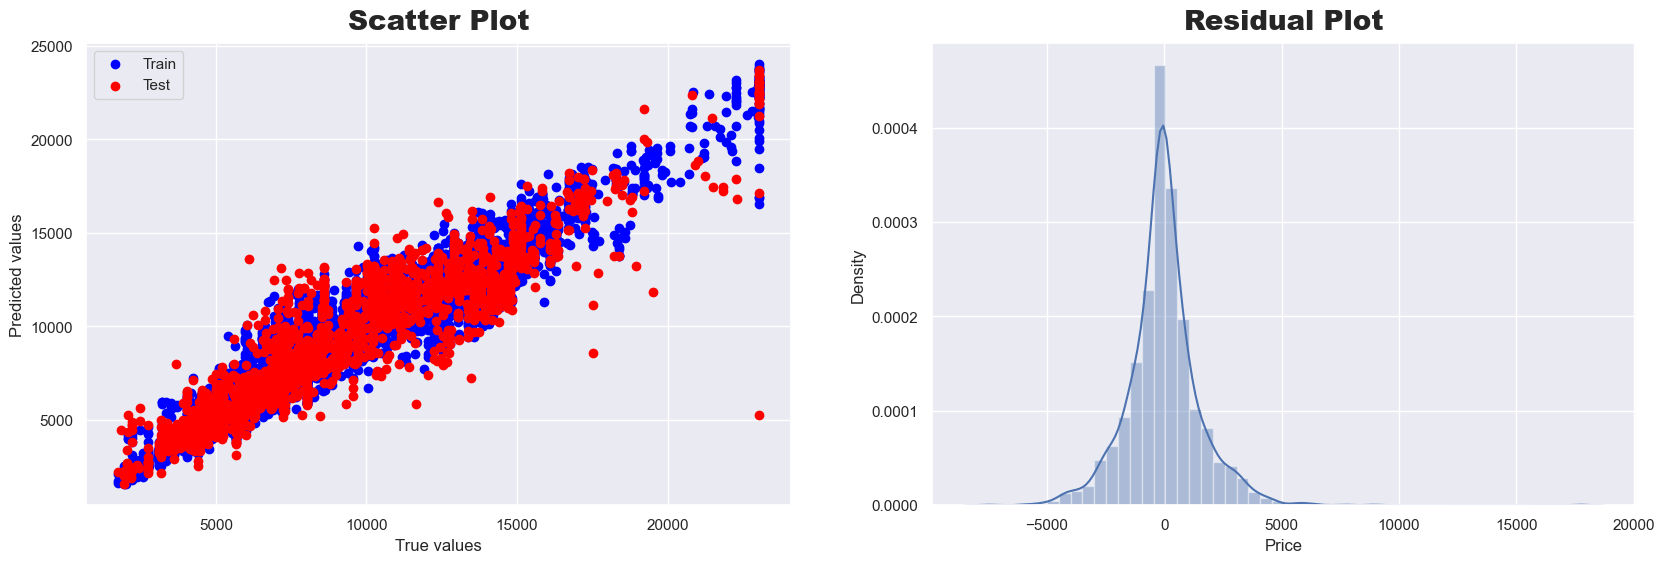

In [176]:
predict(XGBRegressor())

# Combining Results

In [223]:
algos = [
    "LinearRegression", "Lasso", "Ridge", "KNeighborsRegressor", 
    "DecisionTreeRegressor", "RandomForestRegressor", "AdaBoostRegressor", 
    "GradientBoostingRegressor", "XGBRegressor"]

In [225]:
training_scores = [
    0.6283913966790233, 0.6290299654576714, 0.6290358719151448, 
    0.8496141463392922, 0.9640053295432326, 0.9519116144327208, 
    0.6474192624080117, 0.7880220835172662, 0.9301704221835078
]

# R squared values
r2_values = [
    0.6166398199542826, 0.6190284202151439, 0.6190167282019278, 
    0.7765979875872278, 0.717555062149497, 0.8273306014243373, 
    0.6369798034552867, 0.7754850983778867, 0.8667146666406376
]

# Adjusted R squared values
adjusted_r2_values = [
    0.6121907656404058, 0.6146070866006195, 0.6145952588967276, 
    0.7740053143290524, 0.7142771711879825, 0.8253267012474438, 
    0.6327668031085396, 0.7728795095776301, 0.8651678349188655
]

# MAE values
mae_values = [
    1945.2720583533273, 1942.6737430627745, 1942.879933465667, 
    1376.579192546584, 1346.6707676381588, 1133.7504492517492, 
    2085.5521991225974, 1505.859886969846, 1067.910389250907
]

# MSE values
mse_values = [
    7023032.024488522, 6979273.655730113, 6979487.849554934, 
    4092651.1650818205, 5174298.080312351, 3163246.4167286144, 
    6650410.237092438, 4113038.9282448557, 2441743.3351210365
]

# RMSE values
rmse_values = [
    2650.100380077804, 2641.831496467955, 2641.872035045402, 
    2023.030193813681, 2274.708350605051, 1778.5517751048503, 
    2578.8389319793587, 2028.0628511574428, 1562.6078635156796
]

# Create DataFrame
new_df = pd.DataFrame({
    "Model": algos,
    "Training Score": training_scores,
    "R squared": r2_values,
    "Adjusted R squared": adjusted_r2_values,
    "MAE": mae_values,
    "MSE": mse_values,
    "RMSE": rmse_values
})


In [226]:
new_df

,Model,Training Score,R squared,Adjusted R squared,MAE,MSE,RMSE
0,LinearRegression,0.628391,0.616640,0.612191,1945.272058,7.023032e+06,2650.100380
1,Lasso,0.629030,0.619028,0.614607,1942.673743,6.979274e+06,2641.831496
2,Ridge,0.629036,0.619017,0.614595,1942.879933,6.979488e+06,2641.872035
3,KNeighborsRegressor,0.849614,0.776598,0.774005,1376.579193,4.092651e+06,2023.030194
4,DecisionTreeRegressor,0.964005,0.717555,0.714277,1346.670768,5.174298e+06,2274.708351
5,RandomForestRegressor,0.951912,0.827331,0.825327,1133.750449,3.163246e+06,1778.551775
6,AdaBoostRegressor,0.647419,0.636980,0.632767,2085.552199,6.650410e+06,2578.838932
7,GradientBoostingRegressor,0.788022,0.775485,0.772880,1505.859887,4.113039e+06,2028.062851
8,XGBRegressor,0.930170,0.866715,0.865168,1067.910389,2.441743e+06,1562.607864


### Insights:

#### XGBoost Regressor, RandomForest Regressor & GradientBoost Regressor are the top 3 model with highest R2 Score value.

#### Hyper Parameter Tuning of Gradient Boosting Model

In [230]:
ml_model = GradientBoostingRegressor()

In [231]:
param_grid = {
    'n_estimators': np.arange(100, 500, 50),  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': np.arange(3, 8),  
    'min_samples_split': np.arange(3, 8), 
    'min_samples_leaf': np.arange(3, 8)
}

In [233]:
random_search = RandomizedSearchCV(ml_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(x_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42)

In [234]:
best_parameters = random_search.best_params_
best_parameters

{'n_estimators': 400,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_depth': 6,
 'learning_rate': 0.1}

In [235]:
ml_model = GradientBoostingRegressor(**best_parameters)

In [237]:
ml_model.fit(x_train1,y_train1)

GradientBoostingRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=7,
                          n_estimators=400)

In [240]:
y_train_pred = ml_model.predict(x_train1)
y_test_pred = ml_model.predict(x_test1)

#Metrics Calculation.
mae = mean_absolute_error(y_test1,y_test_pred)
mse = mean_squared_error(y_test1,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1,y_test_pred)
adjusted_r2 = 1 - ((1-r2)*(x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))

mae_value.append(mae)
mse_value.append(mse)
rmse_value.append(rmse)
r2_value.append(r2)
adjusted_r2_value.append(adjusted_r2) 

print(f"R2 Score of the model is: ",r2)
print(f"Adjusted R2 Score of the {ml_model} model is: ",adjusted_r2)
print()
print(f"MAE of model is: ",mae)
print(f"MSE of model is: ",mse)
print(f"RMSE of model is: ",rmse)


R2 Score of the model is:  0.8684800267258321
Adjusted R2 Score of the GradientBoostingRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=7,
                          n_estimators=400) model is:  0.8669536827419927

MAE of model is:  1045.7619516307277
MSE of model is:  2409402.5207683383
RMSE of model is:  1552.2250225944492


### Hyper Parameter Tuning of Random Forest Model

In [243]:
ml_model = RandomForestRegressor()

In [249]:
param_dist = {
    'n_estimators': randint(100, 300, 50),  
    'max_depth': randint(1, 8),       
    'min_samples_split': randint(1, 8),
    'min_samples_leaf': randint(1, 8)
}

In [251]:
# Performing Randomized Search CV
random_search = RandomizedSearchCV(
    ml_model, param_distributions=param_dist, n_iter=10, 
    cv=5, n_jobs=-1, random_state=42)

In [252]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002F33B296ED0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002F33B30E210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002F33B2F3090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002F33B2E8F50>},
                   random_state=42)

In [253]:
best_parameters = random_search.best_params_
best_parameters

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 164}

In [254]:
ml_model = RandomForestRegressor(**best_parameters)

In [256]:
ml_model.fit(x_train1,y_train1)

RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=164)

In [258]:
y_train_pred = ml_model.predict(x_train1)
y_test_pred = ml_model.predict(x_test1)

#Metrics Calculation.
mae = mean_absolute_error(y_test1,y_test_pred)
mse = mean_squared_error(y_test1,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1,y_test_pred)
adjusted_r2 = 1 - ((1-r2)*(x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))

mae_value.append(mae)
mse_value.append(mse)
rmse_value.append(rmse)
r2_value.append(r2)
adjusted_r2_value.append(adjusted_r2) 

print(f"R2 Score of the model is: ",r2)
print(f"Adjusted R2 Score of the {ml_model} model is: ",adjusted_r2)
print()
print(f"MAE of model is: ",mae)
print(f"MSE of model is: ",mse)
print(f"RMSE of model is: ",rmse)

R2 Score of the model is:  0.8009901772194519
Adjusted R2 Score of the RandomForestRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=164) model is:  0.7986805854657124

MAE of model is:  1391.3144485233588
MSE of model is:  3645794.298220799
RMSE of model is:  1909.3963177456897


## Hyper Parameter Tuning of XGBoost Model

In [260]:
ml_model = XGBRegressor()

In [261]:
param_grid = {
    'n_estimators': np.arange(100, 500, 50),  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': np.arange(3, 11),  
    'min_child_weight': np.arange(3, 11),  
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [263]:
random_search = RandomizedSearchCV(ml_model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring='r2')
random_search.fit(x_train1, y_train1)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_child_weight': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2')

In [264]:
best_parameters = random_search.best_params_
best_parameters

{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [265]:
ml_model = XGBRegressor(**best_parameters)

In [267]:
ml_model.fit(x_train1,y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [268]:
y_train_pred = ml_model.predict(x_train1)
y_test_pred = ml_model.predict(x_test1)

#Metrics Calculation.
mae = mean_absolute_error(y_test1,y_test_pred)
mse = mean_squared_error(y_test1,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1,y_test_pred)
adjusted_r2 = 1 - ((1-r2)*(x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))

mae_value.append(mae)
mse_value.append(mse)
rmse_value.append(rmse)
r2_value.append(r2)
adjusted_r2_value.append(adjusted_r2) 

print(f"R2 Score of the model is: ",r2)
print(f"Adjusted R2 Score of the {ml_model} model is: ",adjusted_r2)
print()
print(f"MAE of model is: ",mae)
print(f"MSE of model is: ",mse)
print(f"RMSE of model is: ",rmse)

R2 Score of the model is:  0.8684059037583922
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model is:  0.8668786995466907

MAE of model is:  1080.7549928682477
MSE of model is:  2410760.4290780085
RMSE of model is:  1552.6623680240366


## Combining Result of Hyper Parameter Tuned Model in a DataFrame

In [273]:
results = {
    'Model': ['GradientBosstRegressor', 'RandomForestRegressor', 'XGBRegressor'],
    'R2 Score': [0.8685, 0.8010, 0.8684],
    'Adjusted R2 Score': [0.8670, 0.7987, 0.8669],
    'MAE': [1045.76, 1391.31, 1080.75],
    'MSE': [2409402.52, 3645794.30, 2410760.43],
    'RMSE': [1552.23, 1909.40, 1552.66]
}

df = pd.DataFrame(results)
df

,Model,R2 Score,Adjusted R2 Score,MAE,MSE,RMSE
0,GradientBosstRegressor,0.8685,0.8670,1045.76,2409402.52,1552.23
1,RandomForestRegressor,0.8010,0.7987,1391.31,3645794.30,1909.40
2,XGBRegressor,0.8684,0.8669,1080.75,2410760.43,1552.66


### XGBoost Regressor & GradientBoost Regressor are giving the best result after Hyper Parameter Tuning.